# EDA case study

Import the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
#global setting to display all columns and rows
pd.set_option("display.max_columns", 10000)
pd.set_option("display.max_rows", 10000)

## Step 1. Data exploration

In [3]:
#previous loan application data sets
df_prev = pd.read_csv('C:/Python Database/Project Dataset/previous_application.csv')
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#the current loan application datasets
df_appli = pd.read_csv('C:/Python Database/Project Dataset/application_data.csv') 
df_appli.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#columns description for both imported datasets for ease of access
columns_description = pd.read_csv('C:/Python Database/Project Dataset/columns_description.csv', encoding='utf-8',encoding_errors='ignore') 
columns_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### 1a. exploring df_appli (loan application data)

In [6]:
#quick descriptive analysis for the data
df_appli.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
df_appli.shape #(rows, columns)

(307511, 122)

In [8]:
df_appli.info(verbose=True, show_counts=True) #application data info and its null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [9]:
#check the null values % of the application data, rounded to 2 decimal places
missing_values_percent = (df_appli.isnull().sum()*100 / len(df_appli)).round(2)
missing_values_percent.sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

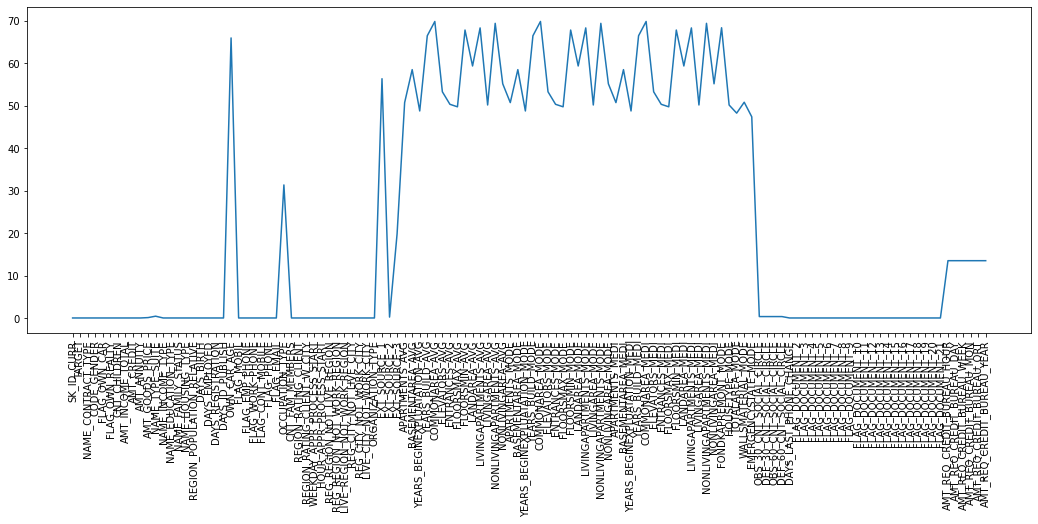

In [10]:
#visualisation of missing datas
plt.figure(figsize=(18, 6))
sns.lineplot(x=missing_values_percent.index, y=missing_values_percent.values)
plt.xticks(rotation=90)
plt.show()

Notes:
1. all client does give the required documents for loan attempts, makes the documents preparation a redundant data
2. the credit bureau request counts are highly granular to be used in analysis
3. ~~probably need to keep only one between the mean, median, mode columns.~~ all of it are location related data. refer #4
4. the living location,building condition, etc. of the client are irrelevant.The REGION_RATING_CLIENT_W_CITYREGION_RATING_CLIENT on the other hand, probably useful for data analysis as it shows the location rating(as in how many people paid their loan at that place) of the client in determining loanability (refer columns_description for confirmation)
5. car age doesnt have any relation to the loanability
6. FLAG_WORK_PHONE is a duplicate of FLAG_PHONE 

In [11]:
#filter out only the required data for the analysis
#filter out columns with more than 40% missing values
df_appli = df_appli[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_REALTY','FLAG_OWN_CAR',
                           'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                          'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 
                          'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 
                          'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL', 
                           'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY', 
                          'REGION_RATING_CLIENT']]
for i in df_appli: 
    print(df_appli[i].value_counts().head(10), '\n\n')

100002    1
337664    1
337661    1
337660    1
337659    1
337658    1
337657    1
337656    1
337655    1
337654    1
Name: SK_ID_CURR, dtype: int64 


0    282686
1     24825
Name: TARGET, dtype: int64 


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
Name: CNT_CHILDREN, dtype: int64 


135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
Name: AMT_INCOME_TOTAL, dtype: int64 


450000.0    9709
675000.0    8877
225000.0    8162
180000.0    7342
270000.0    7241
900000.0    6246
254700.0  

In [12]:
df_appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   FLAG_OWN_CAR                 307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [13]:
#column rename for easier understanding
df_appli.columns = ['SK_ID_CURR', 'Late_Payment', 'Loan_Type', 'Gender', 'Have_Realty', 'Have_Car', 'No_Of_Children', 'Income',
                    'Credit_Loan', 'Loan_Annuity', 'Goods_Price', 'Income_Type', 'Highest_Education', 'Family_Status',
                    'Housing_Type', 'Age', 'Days_Of_Employment', 'Registration_Age', 'ID_Doc_Change_Days_Before_Application', 'Provided_Mobile_No',
                    'Provided_Emp_Phone_No', 'No_Verified', 'Provided_Home_Phone_No', 'Provided_Email', 'Occupation',
                    'Organisation', 'Total_Family_Members', 'City_Area_Rating', 'Living_Area_Rating']

#print out all counts of data in columns for data cleaning purposes
for i in df_appli.columns: 
    print(df_appli[i].value_counts().head(10), '\n\n')

100002    1
337664    1
337661    1
337660    1
337659    1
337658    1
337657    1
337656    1
337655    1
337654    1
Name: SK_ID_CURR, dtype: int64 


0    282686
1     24825
Name: Late_Payment, dtype: int64 


Cash loans         278232
Revolving loans     29279
Name: Loan_Type, dtype: int64 


F      202448
M      105059
XNA         4
Name: Gender, dtype: int64 


Y    213312
N     94199
Name: Have_Realty, dtype: int64 


N    202924
Y    104587
Name: Have_Car, dtype: int64 


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
Name: No_Of_Children, dtype: int64 


135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
Name: Income, dtype: int64 


450000.0    9709
675000.0    8877
225000.0    8162
180000.0    7342
270000.0    7241
900000.0    6246
254700.0    4500
545040.0    4437


<font color='red'>list of data need to convert its types and change the data inside:</font> 
1. Gender, Organisation : have some XNA instead of null values
2. Age, Days_Of_Employment, Registration_Age, ID_Doc_Change_Days_Before_Application : -ve values, should be +ve
3. 365243 days? in DAys_Of_Employment; that's like 1000 years, which is an invalid input, need to correct/remove the data later.
4. Loan related things should be in the bigger units, like millions for example
5. Total Family Members should be integer not float
6. Days_Of_Employment, Registration_Age, ID_Doc_Change_Days_Before_Application should be changed to years for analysis, analysis in days is too granular (too many bars in bar charts for example). does makes it easier to understand in terms of year instead of days
7. binning of some of data in #2 is reccommended for easier data analysis

### 1b. exploring df_prev (previous loan application data)

In [14]:
#quick descriptive analysis for the data
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [15]:
df_prev.shape #(rows, columns)

(1670214, 37)

In [16]:
df_prev.info(verbose=True, show_counts=True) #prev application data info and its null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [17]:
#check the null values % of the previous application data, rounded to 2 decimal places
(df_prev.isnull().sum()*100 / len(df_prev)).round(2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

Notes: safe to assume that the columns with more than 40 missing data  are irrelevant  towards analysis AND not used in df_applibecause is a detailed explanationof past transactions, in which a confirmed loan. 

In [18]:
#filter out columns with more than 40% missing values
condition = (df_prev.isnull().sum()*100 / len(df_prev)).round(2).sort_values(ascending=False) 
df_prev = df_prev[condition[condition < 40].index]

In [19]:
df_prev.info(verbose=True, show_counts=True) #check the filtered datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   AMT_GOODS_PRICE              1284699 non-null  float64
 1   AMT_ANNUITY                  1297979 non-null  float64
 2   CNT_PAYMENT                  1297984 non-null  float64
 3   PRODUCT_COMBINATION          1669868 non-null  object 
 4   CHANNEL_TYPE                 1670214 non-null  object 
 5   NAME_PRODUCT_TYPE            1670214 non-null  object 
 6   NAME_YIELD_GROUP             1670214 non-null  object 
 7   SELLERPLACE_AREA             1670214 non-null  int64  
 8   NAME_SELLER_INDUSTRY         1670214 non-null  object 
 9   NAME_GOODS_CATEGORY          1670214 non-null  object 
 10  NAME_PORTFOLIO               1670214 non-null  object 
 11  SK_ID_PREV                   1670214 non-null  int64  
 12  NAME_CLIENT_TYPE             1670214 non-n

In [20]:
#print out all counts of data in columns for data cleaning purposes
for i in df_prev.columns: 
    print(df_prev[i].value_counts().head(10), '\n\n')

45000.0     47831
225000.0    43549
135000.0    40666
450000.0    38926
90000.0     29367
180000.0    24736
270000.0    20567
675000.0    20235
67500.0     16857
900000.0    15572
Name: AMT_GOODS_PRICE, dtype: int64 


2250.0     31865
11250.0    13974
6750.0     13442
9000.0     12496
22500.0    11903
4500.0     10597
13500.0     7171
3375.0      4806
7875.0      4674
38250.0     4129
Name: AMT_ANNUITY, dtype: int64 


12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
Name: CNT_PAYMENT, dtype: int64 


Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high     

<font color='red'>list of data need to convert its types and change the data inside:</font> 
1. NAME_PRODUCT_TYPE, NAME_YIELD_GROUP, NAME_SELLER_INDUSTRY, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_CLIENT_TYPE, ~~CODE_REJECT_REASON, NAME_CASH_LOAN_PURPOSE~~ , NAME_CONTRACT_TYPE, NAME_PAYMENT_TYPE : have some XNA instead of null values
2. CODE_REJECT_REASON, NAME_CASH_LOAN_PURPOSE: have both XAP and XNA instead of null values
3. DAYS_DECISION : have -ve values, should be +ve

## 2. Data Cleaning

### 2a. Cleaning df_appli dataframe 

detect duplicates

In [21]:
df_appli[df_appli.duplicated()].shape

(0, 29)

1. handling "XNA"

In [22]:
df_appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   SK_ID_CURR                             307511 non-null  int64  
 1   Late_Payment                           307511 non-null  int64  
 2   Loan_Type                              307511 non-null  object 
 3   Gender                                 307511 non-null  object 
 4   Have_Realty                            307511 non-null  object 
 5   Have_Car                               307511 non-null  object 
 6   No_Of_Children                         307511 non-null  int64  
 7   Income                                 307511 non-null  float64
 8   Credit_Loan                            307511 non-null  float64
 9   Loan_Annuity                           307499 non-null  float64
 10  Goods_Price                            307233 non-null  

In [23]:
df_appli.replace("XNA", np.nan, inplace=True)

In [24]:
print(df_appli['Organisation'].value_counts().head(10))
df_appli['Gender'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Name: Organisation, dtype: int64


F    202448
M    105059
Name: Gender, dtype: int64

In [25]:
df_appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   SK_ID_CURR                             307511 non-null  int64  
 1   Late_Payment                           307511 non-null  int64  
 2   Loan_Type                              307511 non-null  object 
 3   Gender                                 307507 non-null  object 
 4   Have_Realty                            307511 non-null  object 
 5   Have_Car                               307511 non-null  object 
 6   No_Of_Children                         307511 non-null  int64  
 7   Income                                 307511 non-null  float64
 8   Credit_Loan                            307511 non-null  float64
 9   Loan_Annuity                           307499 non-null  float64
 10  Goods_Price                            307233 non-null  

#### 2. Handling Outliers

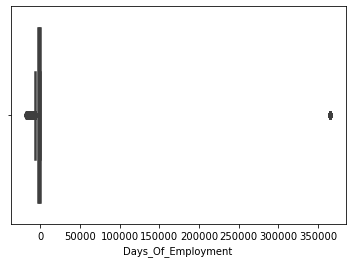

In [26]:
#handling the Days_Of_Employment Column
sns.boxplot(x=df_appli['Days_Of_Employment'], palette="tab10", linewidth=2.5)
plt.show()

In [27]:
#finding the % of the outlier in the Days of Employment column
(df_appli.Days_Of_Employment[df_appli['Days_Of_Employment'] > 350000].value_counts().sum() / len(df_appli) * 100)

18.00716071945394

In [28]:
#checking the outlier for anything 
df_appli[df_appli['Days_Of_Employment'] > 350000]

,SK_ID_CURR,Late_Payment,Loan_Type,Gender,Have_Realty,Have_Car,No_Of_Children,Income,Credit_Loan,Loan_Annuity,Goods_Price,Income_Type,Highest_Education,Family_Status,Housing_Type,Age,Days_Of_Employment,Registration_Age,ID_Doc_Change_Days_Before_Application,Provided_Mobile_No,Provided_Emp_Phone_No,No_Verified,Provided_Home_Phone_No,Provided_Email,Occupation,Organisation,Total_Family_Members,City_Area_Rating,Living_Area_Rating
8,100011,0,Cash loans,F,Y,N,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,-7427.0,-3514,1,0,1,0,0,NaN,NaN,2.0,2,2
11,100015,0,Cash loans,F,Y,N,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246.0,-2512,1,0,1,1,0,NaN,NaN,2.0,2,2
23,100027,0,Cash loans,F,Y,N,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,-9012.0,-3684,1,0,1,1,0,NaN,NaN,2.0,3,3
38,100045,0,Cash loans,F,Y,N,0,99000.000,247275.0,17338.5,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23920,365243,-9817.0,-4969,1,0,1,1,0,NaN,NaN,2.0,2,2
43,100050,0,Cash loans,F,Y,N,0,108000.000,746280.0,42970.5,675000.0,Pensioner,Higher education,Single / not married,House / apartment,-23548,365243,-5745.0,-4576,1,0,1,0,0,NaN,NaN,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,Y,N,0,202500.000,703728.0,29943.0,607500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22414,365243,-11976.0,-4171,1,0,1,0,0,NaN,NaN,1.0,2,2
307483,456227,0,Cash loans,F,Y,N,0,99000.000,247275.0,16479.0,225000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-24911,365243,-11211.0,-4213,1,0,1,0,0,NaN,NaN,1.0,2,2
307487,456231,0,Cash loans,M,Y,N,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,-5485.0,-4115,1,0,1,0,0,NaN,NaN,2.0,2,2
307505,456249,0,Cash loans,F,Y,N,0,112500.000,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,-7369.0,-2357,1,0,1,1,0,NaN,NaN,1.0,2,2


statement:all of the outlier has null values in its Occupation and Organisation columns

In [29]:
#checking the statement above is true or false
condition_test1 = (df_appli.Days_Of_Employment[df_appli['Days_Of_Employment'] > 0 & df_appli['Occupation'].isna() & df_appli['Organisation'].isna()].value_counts().sum() / len(df_appli) * 100)
condition_test1 == (df_appli.Days_Of_Employment[df_appli['Days_Of_Employment'] > 350000].value_counts().sum() / len(df_appli) * 100) 

True

In [30]:
#conclusion for days of employment outlier treatment: standardise the data as null values (same as Occupation and Organisation columns)
df_appli.loc[df_appli["Days_Of_Employment"] >= 0, "Days_Of_Employment"] = np.nan
#note: all data in the columns except for the outliers are negative hence the x >= 0

0.0


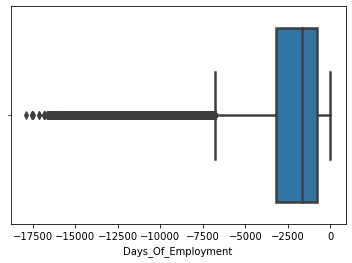

In [31]:
#recheck
print((df_appli.Days_Of_Employment[df_appli['Days_Of_Employment'] > 350000].value_counts().sum() / len(df_appli) * 100))
sns.boxplot(x=df_appli['Days_Of_Employment'], linewidth=2.5)
plt.show()

note: will transform the -ve values later

[]

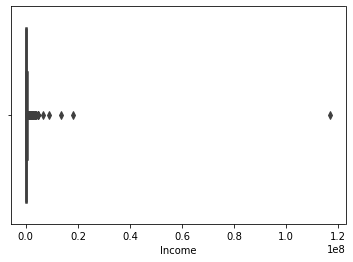

In [32]:
#check Income column for extreme values
sns.boxplot(x=df_appli['Income'], linewidth=2.5)
plt.plot()

In [33]:
#check the details for extreme income value
df_appli[df_appli['Income'] > 100000000]

,SK_ID_CURR,Late_Payment,Loan_Type,Gender,Have_Realty,Have_Car,No_Of_Children,Income,Credit_Loan,Loan_Annuity,Goods_Price,Income_Type,Highest_Education,Family_Status,Housing_Type,Age,Days_Of_Employment,Registration_Age,ID_Doc_Change_Days_Before_Application,Provided_Mobile_No,Provided_Emp_Phone_No,No_Verified,Provided_Home_Phone_No,Provided_Email,Occupation,Organisation,Total_Family_Members,City_Area_Rating,Living_Area_Rating
12840,114967,1,Cash loans,F,Y,N,1,117000000.0,562491.0,26194.5,454500.0,Working,Secondary / secondary special,Married,House / apartment,-12615,-922.0,-6762.0,-3643,1,1,1,0,0,Laborers,Business Entity Type 3,3.0,2,2


In [34]:
#there is only 1 income looks incorrect (117$million).  Conclusion: remove from the row.
df_appli = df_appli[df_appli['Income'] < 100000000]

[]

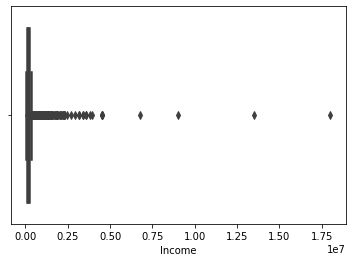

In [35]:
sns.boxplot(x=df_appli['Income'], linewidth=2.5)
plt.plot()

not too extreme value 

Note: Need to isolate the outliers in their own category (ex.High or Very High)

[]

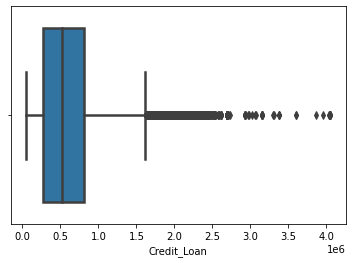

In [36]:
#check the Credit_loan for extreme values
sns.boxplot(x=df_appli['Credit_Loan'], linewidth=2.5)
plt.plot()

[]

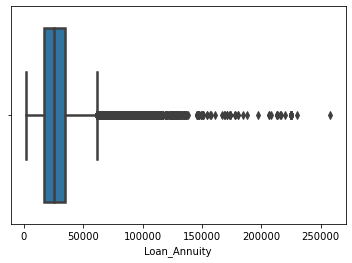

In [37]:
#check the Loan_Annuity for extreme values
sns.boxplot(x=df_appli['Loan_Annuity'], linewidth=2.5)
plt.plot()

Looks good enough

[]

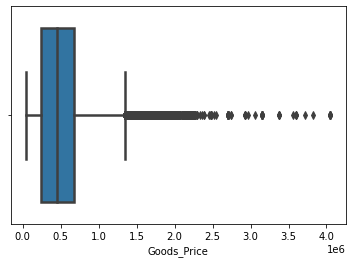

In [38]:
#check the Goods_Price for extreme values
sns.boxplot(x=df_appli['Goods_Price'], linewidth=2.5)
plt.plot()

Looks good enough

[]

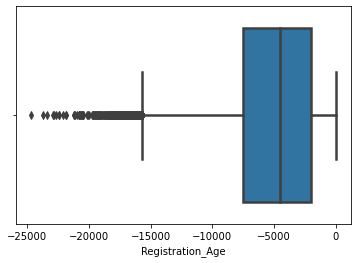

In [39]:
#check the Registration_Age for extreme values
sns.boxplot(x=df_appli['Registration_Age'], linewidth=2.5)
plt.plot()

Looks good enough (will fix the -ve values later)

#### 3. data conversion

In [40]:
#turning the -ve values of Age, Days_Of_Employment, Registration_Age, ID_Doc_Change_Days_Before_Application into +ve
columns = ['Age', 'Days_Of_Employment', 'Registration_Age', 'ID_Doc_Change_Days_Before_Application']
for i in columns:
    df_appli[i]  = df_appli[i].abs()

In [41]:
#double check if there is -ve values
df_appli[['Age', 'Days_Of_Employment', 'Registration_Age', 'ID_Doc_Change_Days_Before_Application']].all() >= 0

Age                                      True
Days_Of_Employment                       True
Registration_Age                         True
ID_Doc_Change_Days_Before_Application    True
dtype: bool

In [42]:
#change Days to Years, in integer
columns = ['Age', 'Days_Of_Employment', 'Registration_Age', 'ID_Doc_Change_Days_Before_Application']
for i in columns:
    df_appli[i]  = df_appli[i].abs() // 365

In [43]:
#convert Credit_Loan, Loan_Annuity, Goods_Price, Income_Type into thousands, rounded into 2 n.p
col =  ['Income', 'Credit_Loan', 'Loan_Annuity', 'Goods_Price']
for i in col:
    df_appli[i]  = round((df_appli[i] / 1000),2) 

In [44]:
df_appli[['Income', 'Credit_Loan', 'Loan_Annuity', 'Goods_Price']].describe()

,Income,Credit_Loan,Loan_Annuity,Goods_Price
count,307510.000000,307510.000000,307498.000000,307232.00000
mean,168.417992,599.026161,27.108618,538.39648
std,108.811808,402.491407,14.493697,369.44703
min,25.650000,45.000000,1.620000,40.50000
25%,112.500000,270.000000,16.520000,238.50000
50%,147.150000,513.530000,24.900000,450.00000
75%,202.500000,808.650000,34.600000,679.50000
max,18000.090000,4050.000000,258.030000,4050.00000


In [45]:
#finding the range of 'very high' (the most sensible value and lowest will be taken), gonna use in quantile-based grouping
col =  ['Income', 'Credit_Loan', 'Loan_Annuity', 'Goods_Price']
for i in col:
    q75, q25 = np.percentile(df_appli[i], [75 ,25])
    max_value = q75 + (q75 - q25) * 1.5 #'maximum' in box plot
    percentile_max = round((np.sum(df_appli[i] <= max_value) / len(df_appli) * 100),0)
    print(percentile_max)
    

95.0
98.0
0.0
0.0


In [46]:
#create a % of income goes to loan repayment
df_appli['Annuity/Income_Percentage'] = df_appli['Loan_Annuity'] / df_appli['Income'] * 100

In [47]:
#create a Loan Credit % to Good Price
df_appli['Loan/Goods_Price_Percentage'] =df_appli['Credit_Loan']  / df_appli['Goods_Price'] * 100

In [48]:
print(df_appli['Age'].max()) #maximum age
print(df_appli['Age'].min()) #minimum age

69
20


In [49]:
#creating Age Binning
Age_labels = ['{0} - {1}'.format(i , i + 9) for i in range(20, 69, 10)]
df_appli['Age_Group'] = pd.cut(df_appli['Age'], range(19, 70, 10), labels=Age_labels)

In [50]:
df_appli[['Age_Group']].value_counts()

Age_Group
30 - 39      82298
40 - 49      76543
50 - 59      68074
20 - 29      45000
60 - 69      35595
dtype: int64

In [51]:
#make income binning, quantiles- based 
df_appli['Income_Group'] = pd.qcut(df_appli.Income, q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['Very Low', 'Low', "Moderate", 'High', 'Very High'])

In [52]:
#make Credit_Loan binning, quantiles-based
df_appli['Loan_Group'] = pd.qcut(df_appli.Credit_Loan, q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['Very Low', 'Low', "Moderate", 'High', 'Very High'])
df_appli.sort_values(by=['Loan_Group', 'Credit_Loan'])

,SK_ID_CURR,Late_Payment,Loan_Type,Gender,Have_Realty,Have_Car,No_Of_Children,Income,Credit_Loan,Loan_Annuity,Goods_Price,Income_Type,Highest_Education,Family_Status,Housing_Type,Age,Days_Of_Employment,Registration_Age,ID_Doc_Change_Days_Before_Application,Provided_Mobile_No,Provided_Emp_Phone_No,No_Verified,Provided_Home_Phone_No,Provided_Email,Occupation,Organisation,Total_Family_Members,City_Area_Rating,Living_Area_Rating,Annuity/Income_Percentage,Loan/Goods_Price_Percentage,Age_Group,Income_Group,Loan_Group
3055,103566,0,Cash loans,F,N,N,0,36.00,45.0,4.58,45.0,Pensioner,Secondary / secondary special,Separated,Municipal apartment,48,NaN,15.0,3,1,0,1,0,0,NaN,NaN,1.0,2,2,12.722222,100.0,40 - 49,Very Low,Very Low
3320,103883,0,Cash loans,F,Y,N,0,103.50,45.0,4.74,45.0,Commercial associate,Secondary / secondary special,Married,House / apartment,46,4.0,2.0,1,1,1,1,1,0,Sales staff,Self-employed,2.0,2,2,4.579710,100.0,40 - 49,Very Low,Very Low
4658,105446,0,Cash loans,F,N,N,0,112.50,45.0,4.85,45.0,State servant,Secondary / secondary special,Separated,With parents,26,3.0,12.0,6,1,1,1,1,0,Core staff,Kindergarten,1.0,2,2,4.311111,100.0,20 - 29,Very Low,Very Low
5925,106941,0,Cash loans,F,Y,N,0,67.50,45.0,4.72,45.0,Working,Secondary / secondary special,Married,House / apartment,45,3.0,30.0,0,1,1,1,1,0,Cleaning staff,Business Entity Type 3,2.0,2,2,6.992593,100.0,40 - 49,Very Low,Very Low
6302,107356,0,Cash loans,F,Y,N,2,90.00,45.0,4.58,45.0,Working,Secondary / secondary special,Married,House / apartment,42,19.0,21.0,13,1,1,1,1,0,Private service staff,Business Entity Type 3,4.0,2,2,5.088889,100.0,40 - 49,Very Low,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119681,238782,0,Cash loans,M,Y,Y,1,931.36,4050.0,102.51,4050.0,Commercial associate,Higher education,Married,House / apartment,34,1.0,5.0,12,1,1,1,1,0,Managers,Transport: type 4,3.0,2,2,11.006485,100.0,30 - 39,Very High,Very High
120757,240007,0,Cash loans,M,N,N,0,587.25,4050.0,106.97,4050.0,Commercial associate,Higher education,Married,House / apartment,54,1.0,27.0,9,1,1,1,1,0,NaN,Industry: type 1,2.0,1,1,18.215411,100.0,50 - 59,Very High,Very High
133766,255139,0,Cash loans,F,N,Y,1,1307.59,4050.0,100.20,4050.0,Commercial associate,Higher education,Married,House / apartment,42,0.0,7.0,3,1,1,1,0,0,Managers,Trade: type 2,3.0,1,1,7.662952,100.0,40 - 49,Very High,Very High
287732,433294,0,Cash loans,F,N,Y,1,405.00,4050.0,102.51,4050.0,Commercial associate,Higher education,Married,House / apartment,31,1.0,0.0,2,1,1,1,0,0,Accountants,Business Entity Type 3,3.0,2,2,25.311111,100.0,30 - 39,Very High,Very High


### 2b. Cleaning df_prev dataframe

check duplicate rows

In [53]:
df_prev[df_prev.duplicated()].shape

(0, 26)

In [54]:
# checking df_prev shape
df_prev.shape

(1670214, 26)

In [56]:
df_prev.drop_duplicates(keep="last",inplace=True)

In [56]:
# handling both "XAP" and "XNA"
df_prev.replace("XNA", np.nan,inplace=True)
df_prev.replace("XAP", np.nan,inplace=True)

In [57]:
## Removing SK_ID_PREV as theres already SK_ID_CURR in df_prev, making it unnecessaary to keep SK_ID_PREV

df_prev.drop(columns=['SK_ID_PREV'], inplace=True)

2. data conversion

In [58]:
#convert DAYS_DECISION -ve to +ve
df_prev["DAYS_DECISION"] = df_prev["DAYS_DECISION"].abs()

In [59]:
#convert Credit_Loan, Loan_Annuity, Goods_Price, Income_Type into thousands, rounded into 2 n.p

col =['AMT_ANNUITY' , 'AMT_APPLICATION' , 'AMT_CREDIT', 'AMT_GOODS_PRICE']
for i in col:
    df_prev[i]  = round((df_prev[i] / 1000),2) 

In [60]:
(df_prev.isnull().sum()*100 / len(df_prev)).round(2).sort_values(ascending=False)

NAME_CASH_LOAN_PURPOSE         95.83
CODE_REJECT_REASON             81.33
NAME_PRODUCT_TYPE              63.68
NAME_GOODS_CATEGORY            56.93
NAME_SELLER_INDUSTRY           51.23
NAME_PAYMENT_TYPE              37.56
NAME_YIELD_GROUP               30.97
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
NAME_PORTFOLIO                 22.29
AMT_ANNUITY                    22.29
NAME_CLIENT_TYPE                0.12
NAME_CONTRACT_TYPE              0.02
PRODUCT_COMBINATION             0.02
HOUR_APPR_PROCESS_START         0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
CHANNEL_TYPE                    0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
SELLERPLACE_AREA                0.00
DAYS_DECISION                   0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
dtype: float64

## 3. Data Analysis

### 3a. Analysis df_appli

In [61]:
# Subsets for late payment and no late payment
default_df = df_appli[df_appli['Late_Payment'] == 1]  # For defaults
non_default_df = df_appli[df_appli['Late_Payment'] == 0]  # For non-defaults

In [62]:
# Bar Chart function
def BarChart(predictors):
    for i in predictors:
        plt.figure(figsize=(12, 6))

        # Calculate percentages for Late Payment (default)
        default_percentage = (default_df[i].value_counts() / df_appli[i].value_counts() * 100)

        # all payment
        plt.subplot(1, 2, 1)
        sns.countplot(data=df_appli, x=i, palette='colorblind', order=df_appli[i].value_counts().index)
        plt.title(f'{i} Distribution for All Payment')
        plt.xticks(rotation=90)
        plt.xlabel(i, fontsize=12)
        plt.ylabel('Count', fontsize=12)

        # percentage of Late Payment (default)
        plt.subplot(1, 2, 2)
        sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='colorblind', order=default_percentage.sort_values(ascending=False).index)
        plt.title(f'{i} Percentage Distribution for Late Payment (Default)')
        plt.xticks(rotation=90)
        plt.xlabel(i, fontsize=12)
        plt.ylabel('Percentage (%)', fontsize=12)

        plt.tight_layout()
        plt.show()

In [63]:
# Pie Chart function
def PieChart(p_predictors):
    for i in p_predictors:
        #All Loan
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        plt.title(f'Distribution of All Loans based on {i}')
        plt.pie(df_appli[i].value_counts(), autopct='%1.2f%%', labels=df_appli[i].value_counts().index)

        #Late Payment
        plt.subplot(1,2,2)
        plt.title(f'{i} Distribution for Late Payment (Default)')
        plt.pie(default_df[i].value_counts(), autopct='%1.2f%%', labels=default_df[i].value_counts().index)

        plt.tight_layout()
        plt.show()

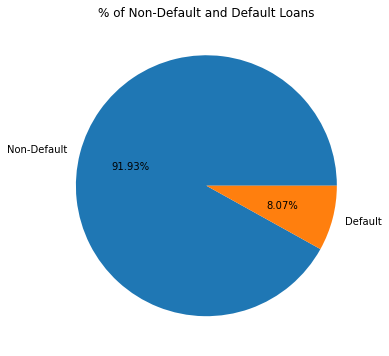

In [64]:
plt.figure(figsize=(12, 6))
plt.pie(df_appli.Late_Payment.value_counts() ,autopct='%1.2f%%', labels = ['Non-Default', 'Default'], )
plt.title('% of Non-Default and Default Loans')
plt.show()

From the pie chart: 8.07% of loans are defaulted

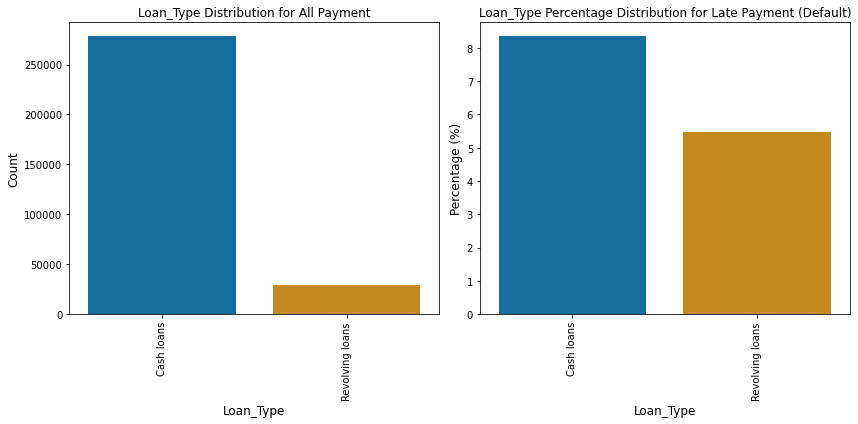

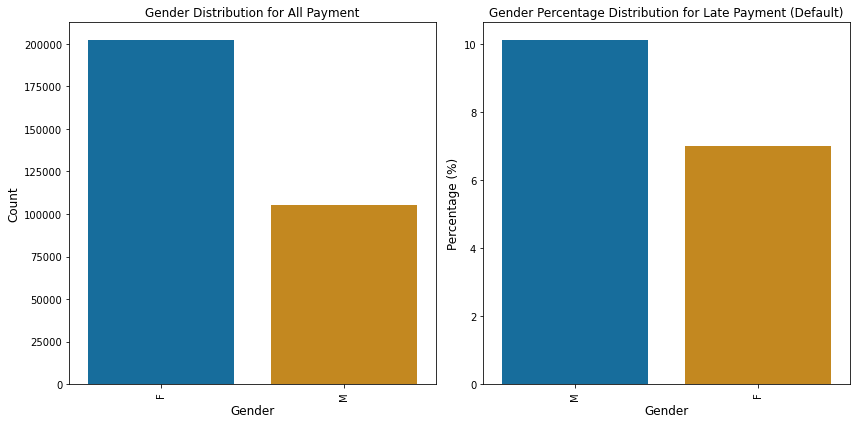

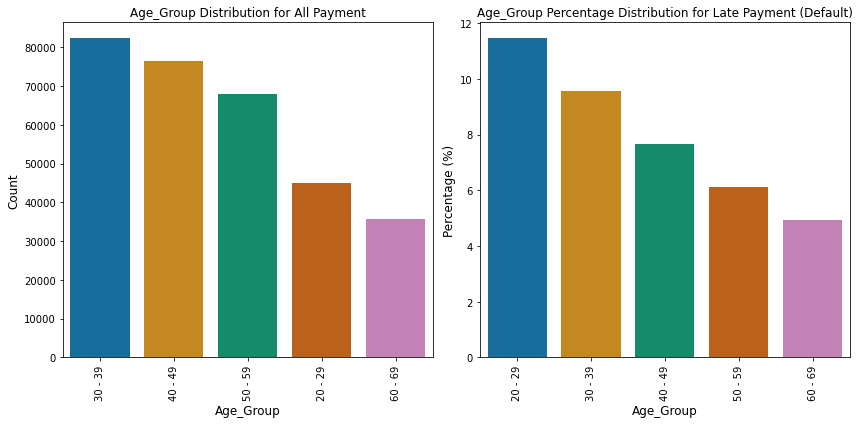

In [65]:
predictors1 = ['Loan_Type', 'Gender', 'Age_Group']
BarChart(predictors1)

From the Bar Graphs and % calculations:
1. Cash Loan are the majority for both loans type and cotributors to defaults.
2. We can see that % of loan non-default of males are low but the defaulted % for Males are higher, this shows that males have higher chance of becoming a defaulter than females.
3. people that are in their 20s and 30s shows higher % in the default graph compared to other age groups. This shows that this group are likely to become a defaulter.

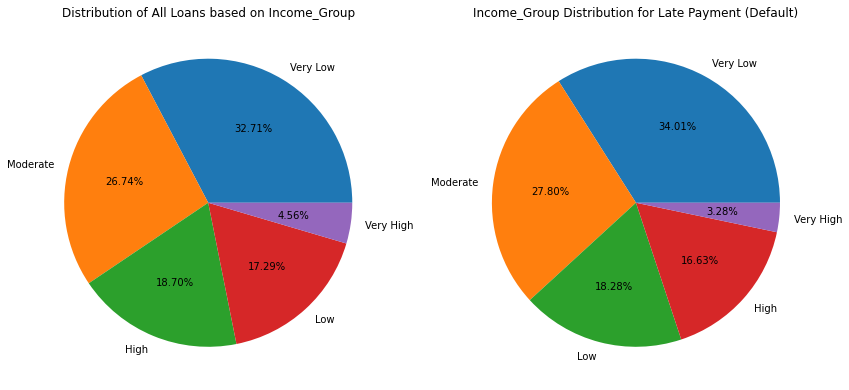

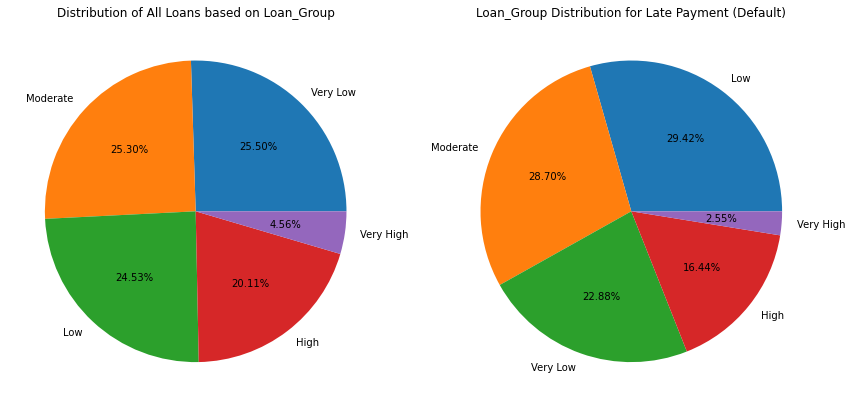

In [66]:
# predictors2:analysis of All loans vs defaulters
predictors2 = ['Income_Group', 'Loan_Group']
PieChart(predictors2)

From the Pie Charts and its %:

1.  As you can see from the 2 top pie charts it’s clear that major % of loans and its defaulters falls in the Very Low Income Group followed by Moderate.
2. In the middle 2 pie charts, moderate and very low loan group almost shares majority %, while a different case in late payment(default), where Low loan group have the majority % followed by Moderate.

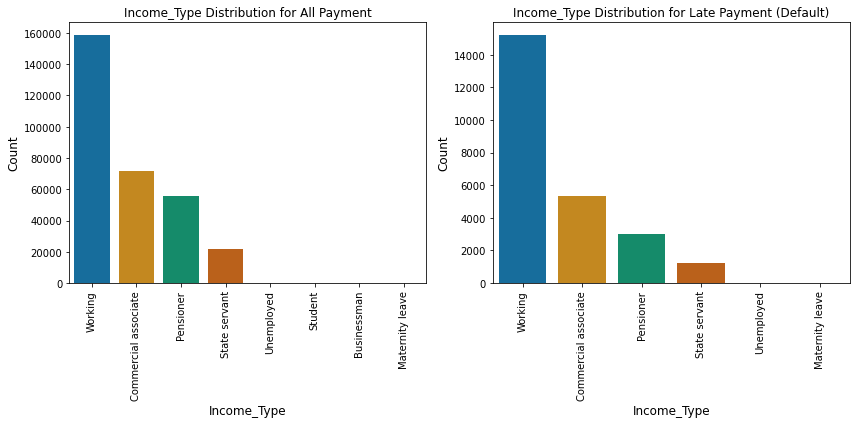

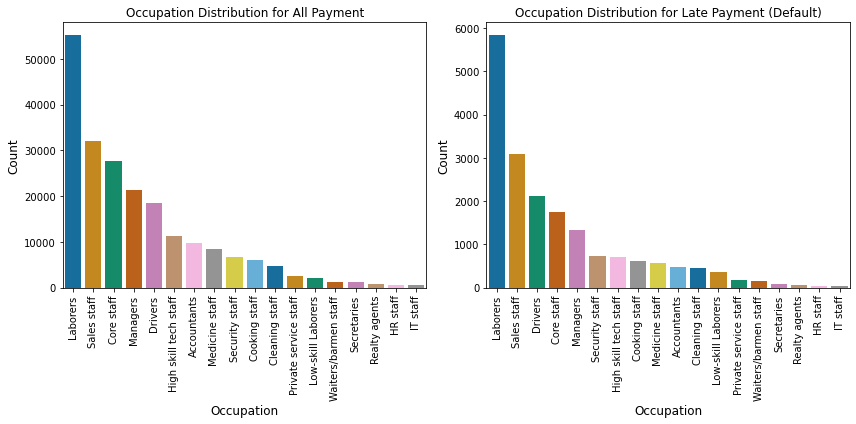

In [67]:
#making another bar chart here to avoid overcrowding a single output.
# work and income_Type analysis
predictors3 = ['Income_Type', 'Occupation']
for i in predictors3:
    plt.figure(figsize=(12, 6))
    
    
    # No Late Payment (non-default)
    plt.subplot(1, 2, 1)
    sns.countplot(data=df_appli, x=i, palette='colorblind', order=df_appli[i].value_counts().index)
    plt.title(f'{i} Distribution for All Payment')
    plt.xticks(rotation=90)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Late Payment (default)
    plt.subplot(1, 2, 2)
    sns.countplot(data=default_df, x=i, palette='colorblind', order=default_df[i].value_counts().index)
    plt.title(f'{i} Distribution for Late Payment (Default)')
    plt.xticks(rotation=90)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()

1. Top Bar charts: Working people dominates the chart of all payments and defaults
2. From bottom bar chart: Laborers are the majority of the loaners and also the majority of defaulters

In [68]:
new_x = default_df['Organisation'].value_counts() / df_appli['Organisation'].value_counts() * 100
new_x = new_x.sort_values(ascending=False)

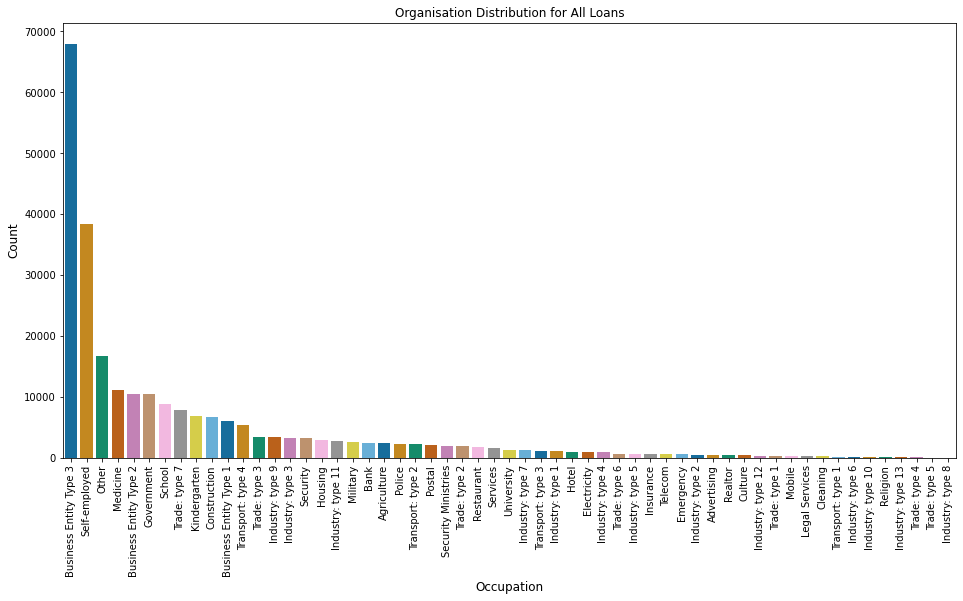

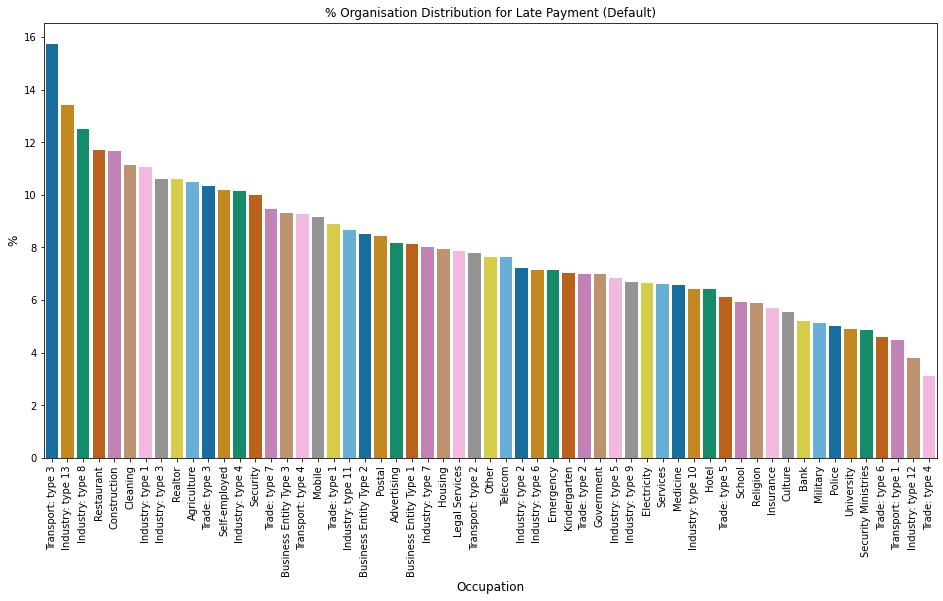

In [69]:
#Organisation wise analysis
plt.figure(figsize=(16,8))
sns.countplot(data=df_appli, x='Organisation',order=df_appli['Organisation'].value_counts().index, palette='colorblind')
plt.title(f'Organisation Distribution for All Loans')
plt.xticks(rotation=90)
plt.xlabel(i, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show() 

# Late Payment (default) %
plt.figure(figsize=(16,8))
sns.barplot(x=new_x.index, y=new_x.values, palette='colorblind')
plt.title(f'% Organisation Distribution for Late Payment (Default)')
plt.xticks(rotation=90)
plt.xlabel(i, fontsize=12)
plt.ylabel('%', fontsize=12)
plt.show()

Business Entity Type 3 have taken the most loan but Transport: type 3 are the most % of defaults.

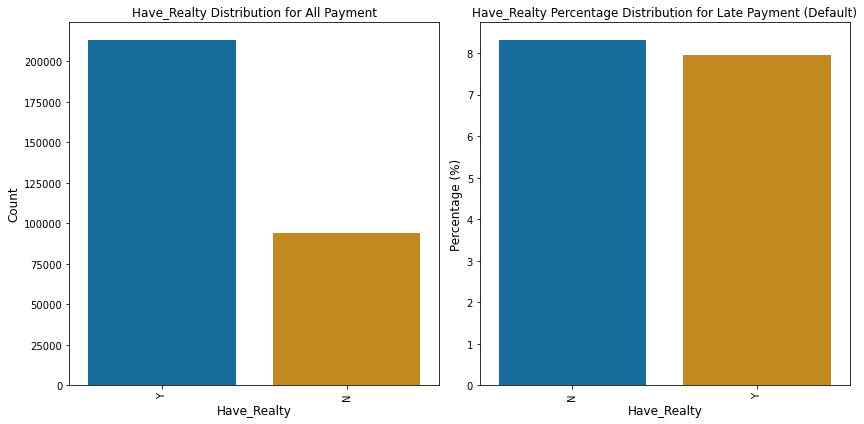

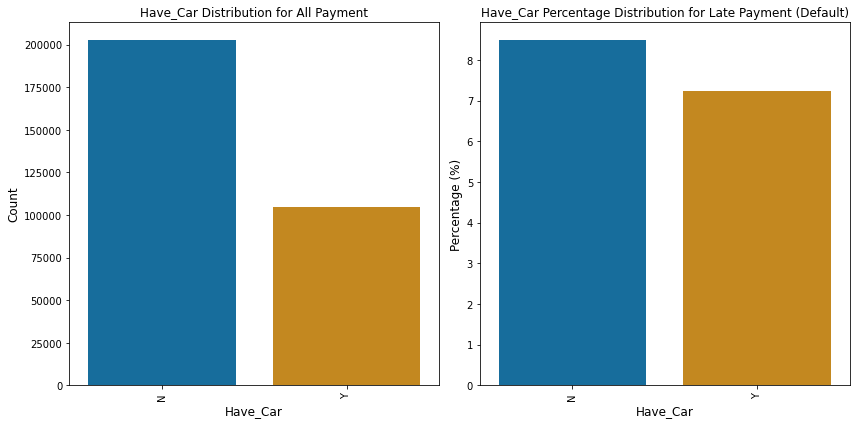

In [70]:
# Property wise analysis
predictors4 = [ 'Have_Realty', 'Have_Car']
BarChart(predictors4)

1. based on the bar charts, having a car or realty doesnt shows any trend that the loan are default or not. Majority have realty and majority dont have cars. Both have almost the same % of defaults.

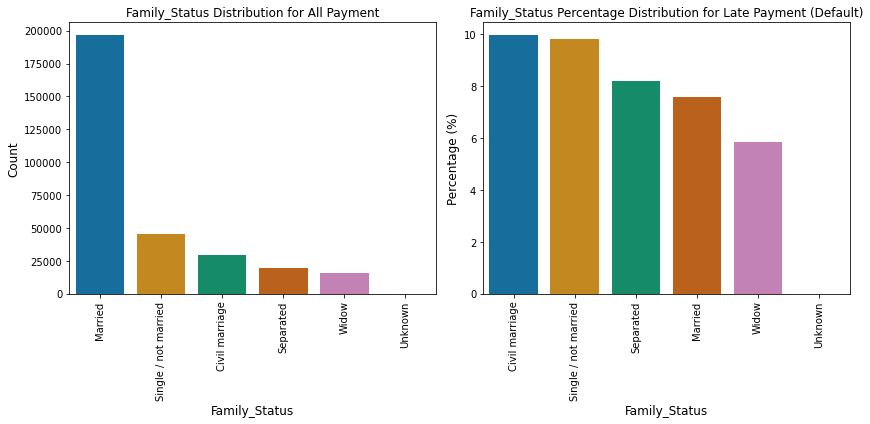

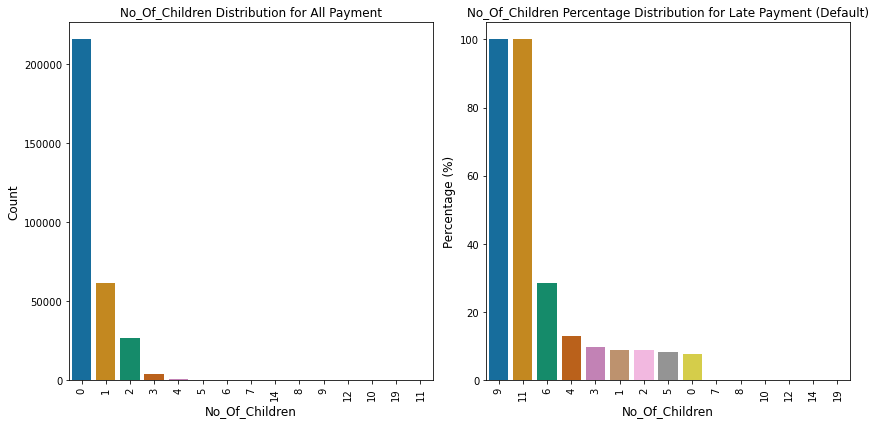

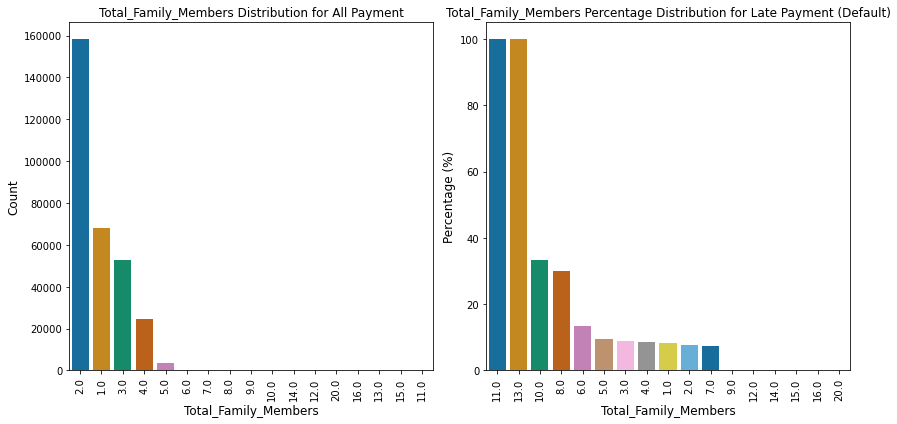

In [71]:
# Family and children analysis
predictors5 = [ 'Family_Status','No_Of_Children', 'Total_Family_Members']
BarChart(predictors5)

1. top charts: Married clients are take the most loans and also most defaulted as well
2. middle char: childless client take the most loans and also most defaulted as well
3. bottom charts: married people with 2 family members take the most loans and also most defaulted as well

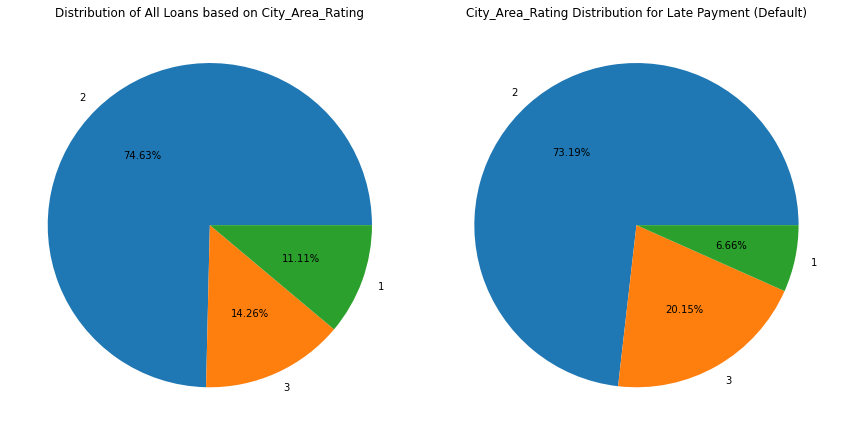

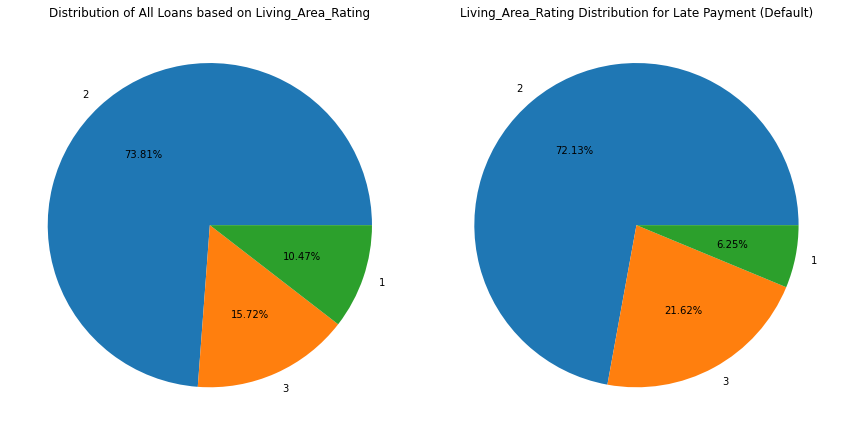

In [72]:
# City Area and Living Area analysis
predictors6 = [ 'City_Area_Rating', 'Living_Area_Rating']
PieChart(predictors6)

1. top charts: city rating category 2 take the most loan and also have the most default.
2. bottom charts: living rating category  2 take the most loan and also have the most default, the default % of no 3 is higher than non defaulters

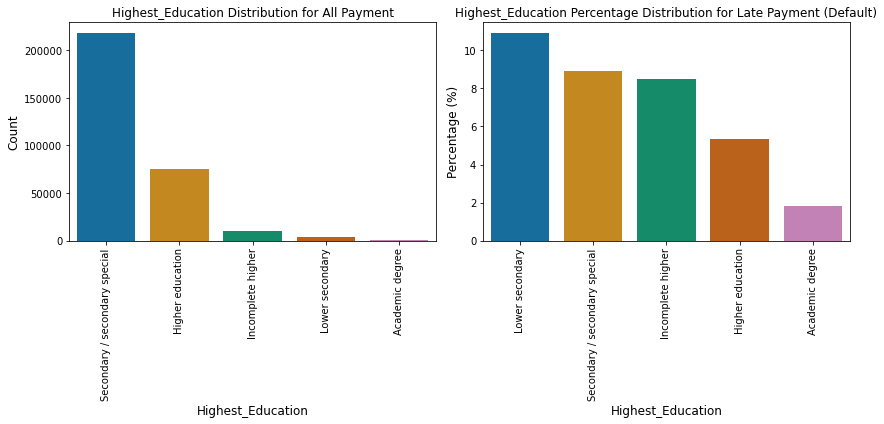

In [73]:
#Education as factor analysis
predictors7 = [ 'Highest_Education']
BarChart(predictors7)

clients with a secondary education contribute the most to default (10%)

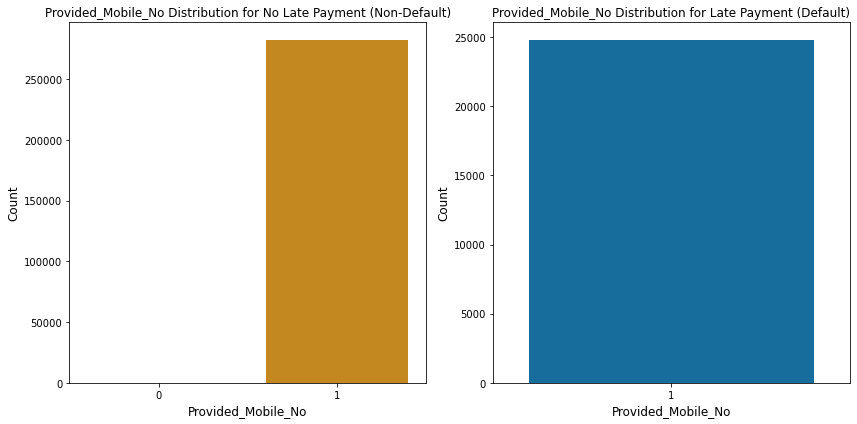

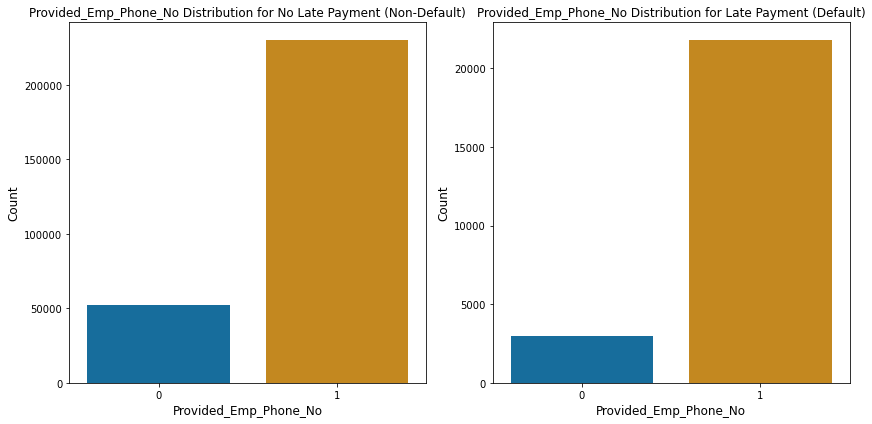

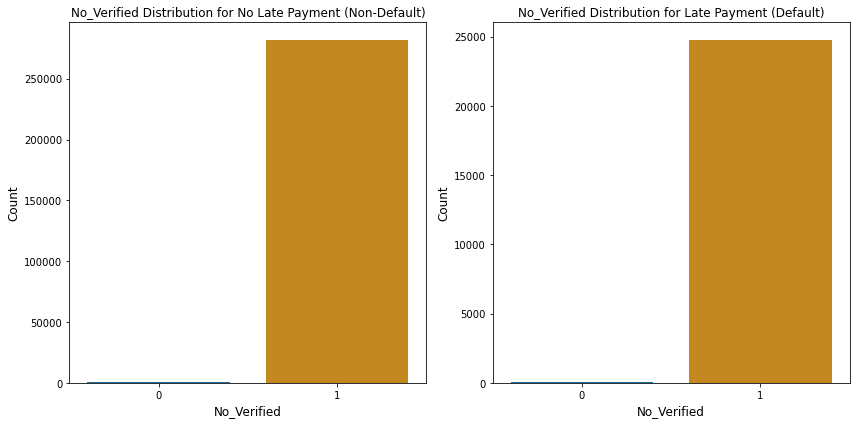

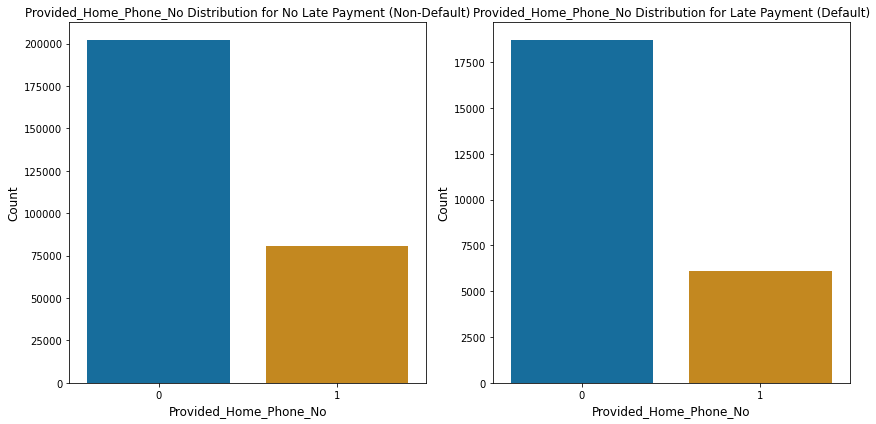

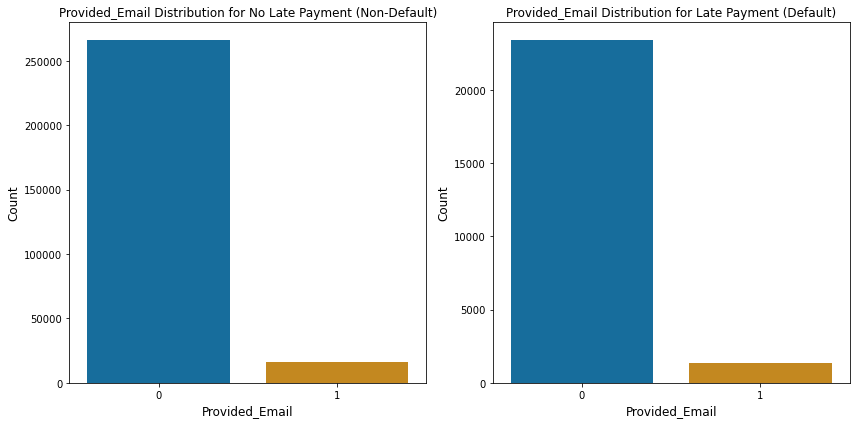

In [74]:
# Provided Personal Data info analysis
predictors8 = [ 'Provided_Mobile_No', 'Provided_Emp_Phone_No', 'No_Verified', 'Provided_Home_Phone_No', 'Provided_Email' ]

for i in predictors8:
    
    plt.figure(figsize=(12, 6))
    # No Late Payment (non-default)
    plt.subplot(1, 2, 1)
    sns.countplot(data=non_default_df, x=i, palette='colorblind')
    plt.title(f'{i} Distribution for No Late Payment (Non-Default)')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Late Payment (default)
    plt.subplot(1, 2, 2)
    sns.countplot(data=default_df, x=i, palette='colorblind')
    plt.title(f'{i} Distribution for Late Payment (Default)')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()

1. all of the Provided_Mobile_No, Provided_Emp_Phone_No, No_Verified, Provided_Home_Phone_No, Provided_Email doesnt show any trend to say if the client defaulted or not based on the aforementioned predictors

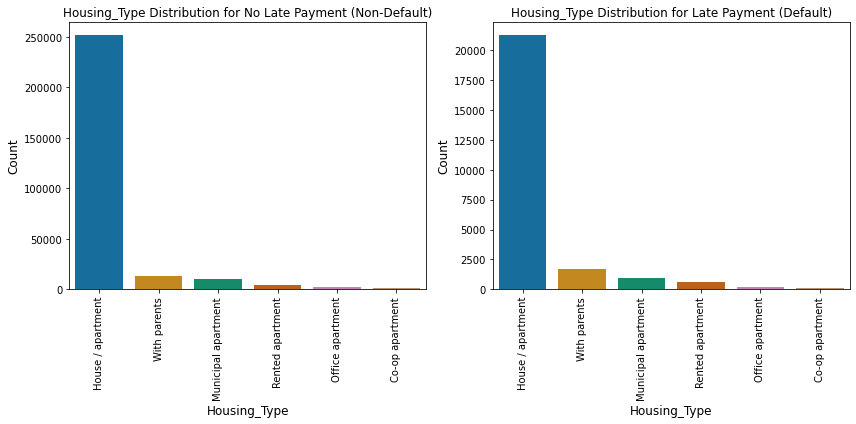

In [75]:
#Housing Type analysis
predictors9 = ['Housing_Type']

for i in predictors9:
    
    plt.figure(figsize=(12, 6))
    # No Late Payment (non-default)
    plt.subplot(1, 2, 1)
    sns.countplot(data=non_default_df, x=i,order=non_default_df[i].value_counts().index, palette='colorblind')
    plt.title(f'{i} Distribution for No Late Payment (Non-Default)')
    plt.xticks(rotation=90)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Late Payment (default)
    plt.subplot(1, 2, 2)
    sns.countplot(data=default_df, x=i,order=default_df[i].value_counts().index, palette='colorblind')
    plt.title(f'{i} Distribution for Late Payment (Default)')
    plt.xticks(rotation=90)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()

Majority of non-defaulter and defaulters are living in House/apartment

#### Numerical Analysis

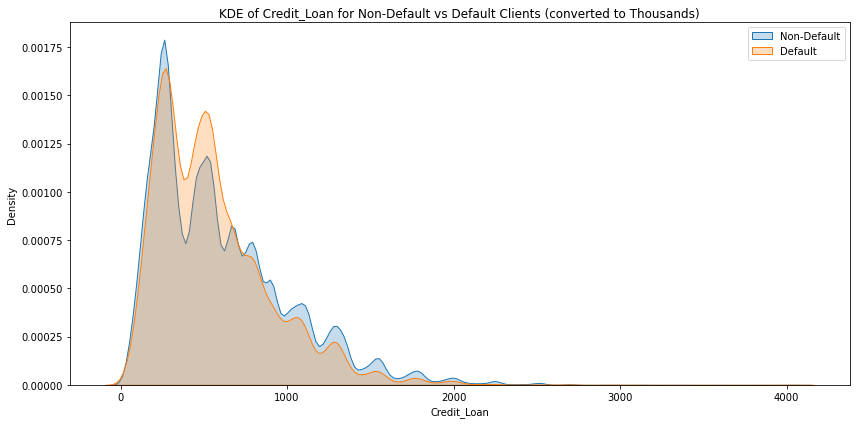

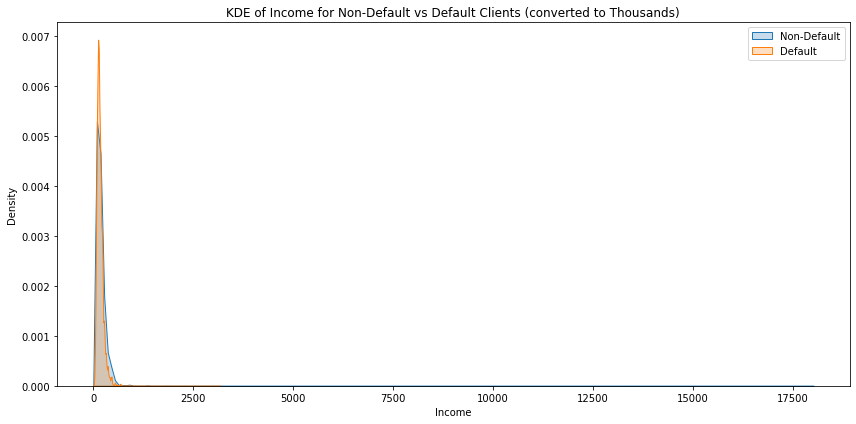

In [76]:
#distribution analysis of Loan and Income amount of non-default and default
predictors10 = ['Credit_Loan', 'Income']

for i in predictors10:
    plt.figure(figsize=(12, 6))  # Create one figure for both plots
    
    # Plot for non-default clients
    sns.kdeplot(data=non_default_df, x=i, label='Non-Default', fill=True, common_norm=False)
    
    # Plot for default clients
    sns.kdeplot(data=default_df, x=i, label='Default', fill=True, common_norm=False)
    
    # Add title and legend
    plt.title(f'KDE of {i} for Non-Default vs Default Clients (converted to Thousands)')
    plt.legend()  # Show the legend to differentiate between the two datasets
    
    # Adjust layout and show the combined plot
    plt.tight_layout()
    plt.show()

1. The loan amount are is the most concentrated around the area of 500 000 to 1 000 000 (note: this density graph x-axis are in thousands)
2. The Income is mostly concentrated around 100 - 400 thousands

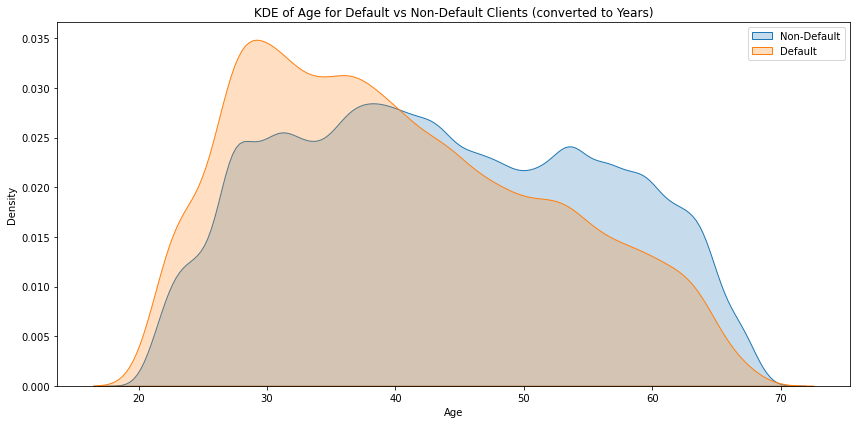

In [77]:
#Distribution of Age of non-default and default
predictors11 = ['Age']

for i in predictors11:
    plt.figure(figsize=(12, 6))  # Create one figure for both plots
    
    # Plot for non-default clients
    sns.kdeplot(data=non_default_df, x=i, label='Non-Default', fill=True, common_norm=False)
    
    # Plot for default clients
    sns.kdeplot(data=default_df, x=i, label='Default', fill=True, common_norm=False)
    
    # Add title and legend
    plt.title(f'KDE of {i} for Default vs Non-Default Clients (converted to Years)')
    plt.legend()  # Show the legend to differentiate between the two datasets
    
    # Adjust layout and show the combined plot
    plt.tight_layout()
    plt.show()

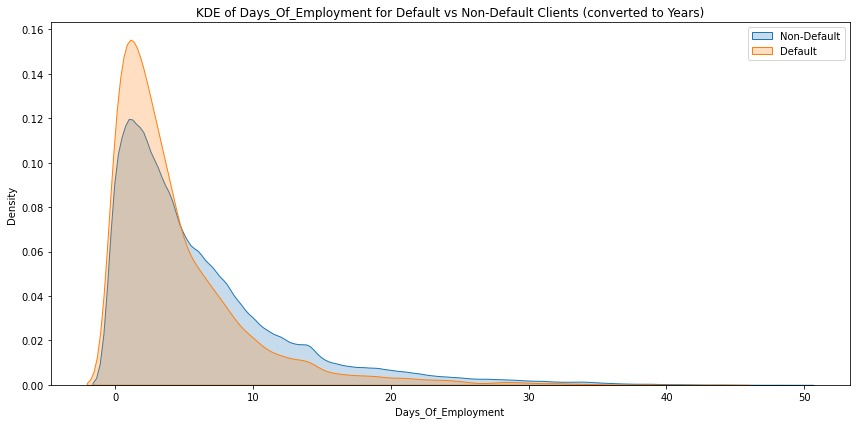

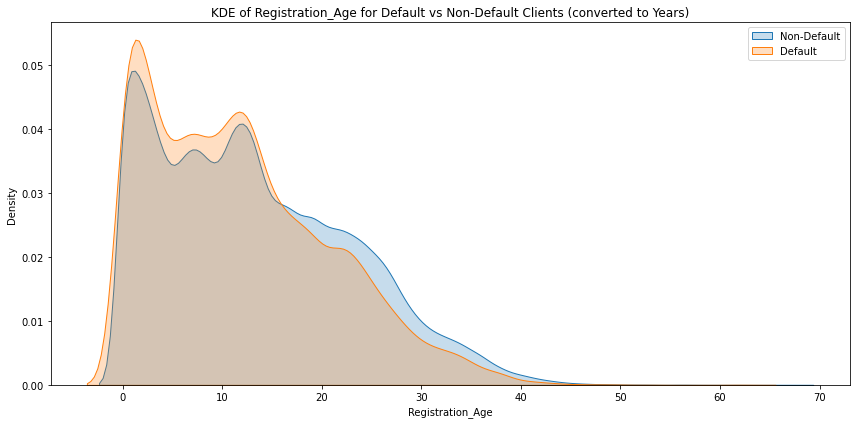

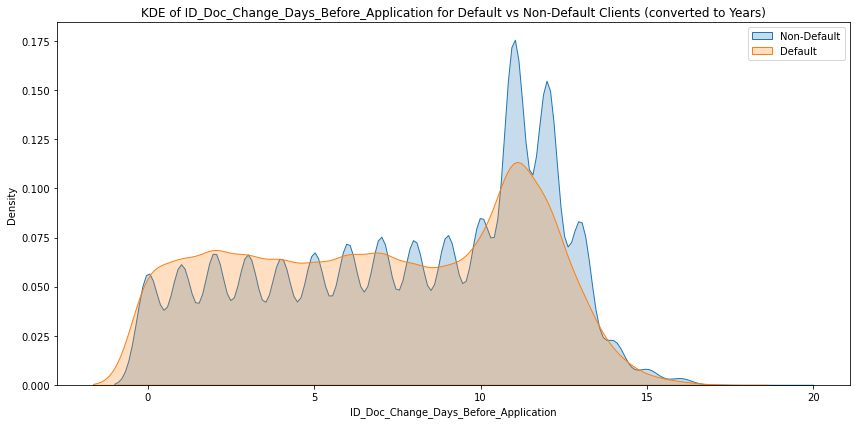

In [78]:
predictors12 = ['Days_Of_Employment', 'Registration_Age', 'ID_Doc_Change_Days_Before_Application']

for i in predictors12:
    plt.figure(figsize=(12, 6))  # Create one figure for both plots
    
    # Plot for non-default clients
    sns.kdeplot(data=non_default_df, x=i, label='Non-Default', fill=True, common_norm=False)
    
    # Plot for default clients
    sns.kdeplot(data=default_df, x=i, label='Default', fill=True, common_norm=False)
    
    # Add title and legend
    plt.title(f'KDE of {i} for Default vs Non-Default Clients (converted to Years)')
    plt.legend()  # Show the legend to differentiate between the two datasets
    
    # Adjust layout and show the combined plot
    plt.tight_layout()
    plt.show()

1. Concentrated Years of employment at around 2-3 years of employment for both non-defaulter and defaulter
2. highest peak at 1-3 years of registration age
3. Majority of the loan applications have ID doc change days before application are around 11-12 yrs old for both non-defualter and defaulter ones.(note: we already change the unit from days to years)


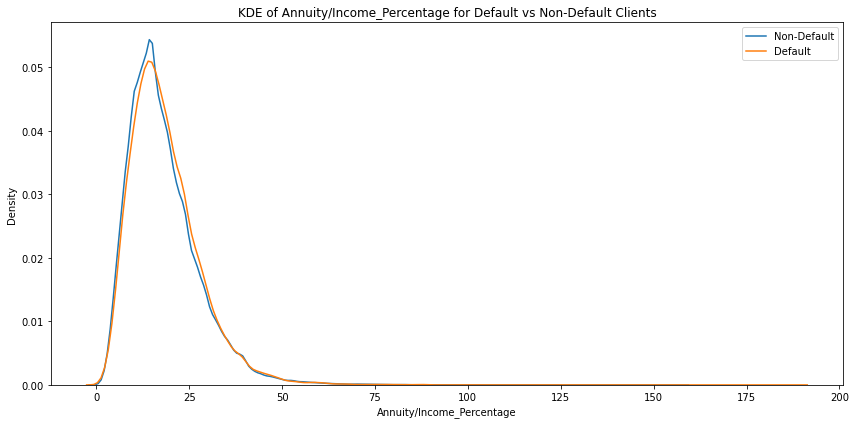

In [79]:
#analysis of concentration % of income/annuity and Loan Credit % to Goods Price
predictors13 = 'Annuity/Income_Percentage'

# Create the figure
plt.figure(figsize=(12, 6))  # Define the size of the figure

# Plot KDE for non-default clients
sns.kdeplot(data=non_default_df, x=predictors13, label='Non-Default', common_norm=False)

# Plot KDE for default clients
sns.kdeplot(data=default_df, x=predictors13, label='Default', common_norm=False)

# Add title and legend
plt.title(f'KDE of {predictors13} for Default vs Non-Default Clients')
plt.legend()  # Add a legend to differentiate between Non-Default and Default

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

1. Graph: Annuity/Income % of both defaulter and non-defaulter loans are concentrated around 10%- 30% and peaking at arounnd 20%.

In [80]:
# Subsets for late payment and no late payment
default_df = df_appli[df_appli['Late_Payment'] == 1]  # For defaults
non_default_df = df_appli[df_appli['Late_Payment'] == 0]  # For non-defaults

#### Multivariative Analysis

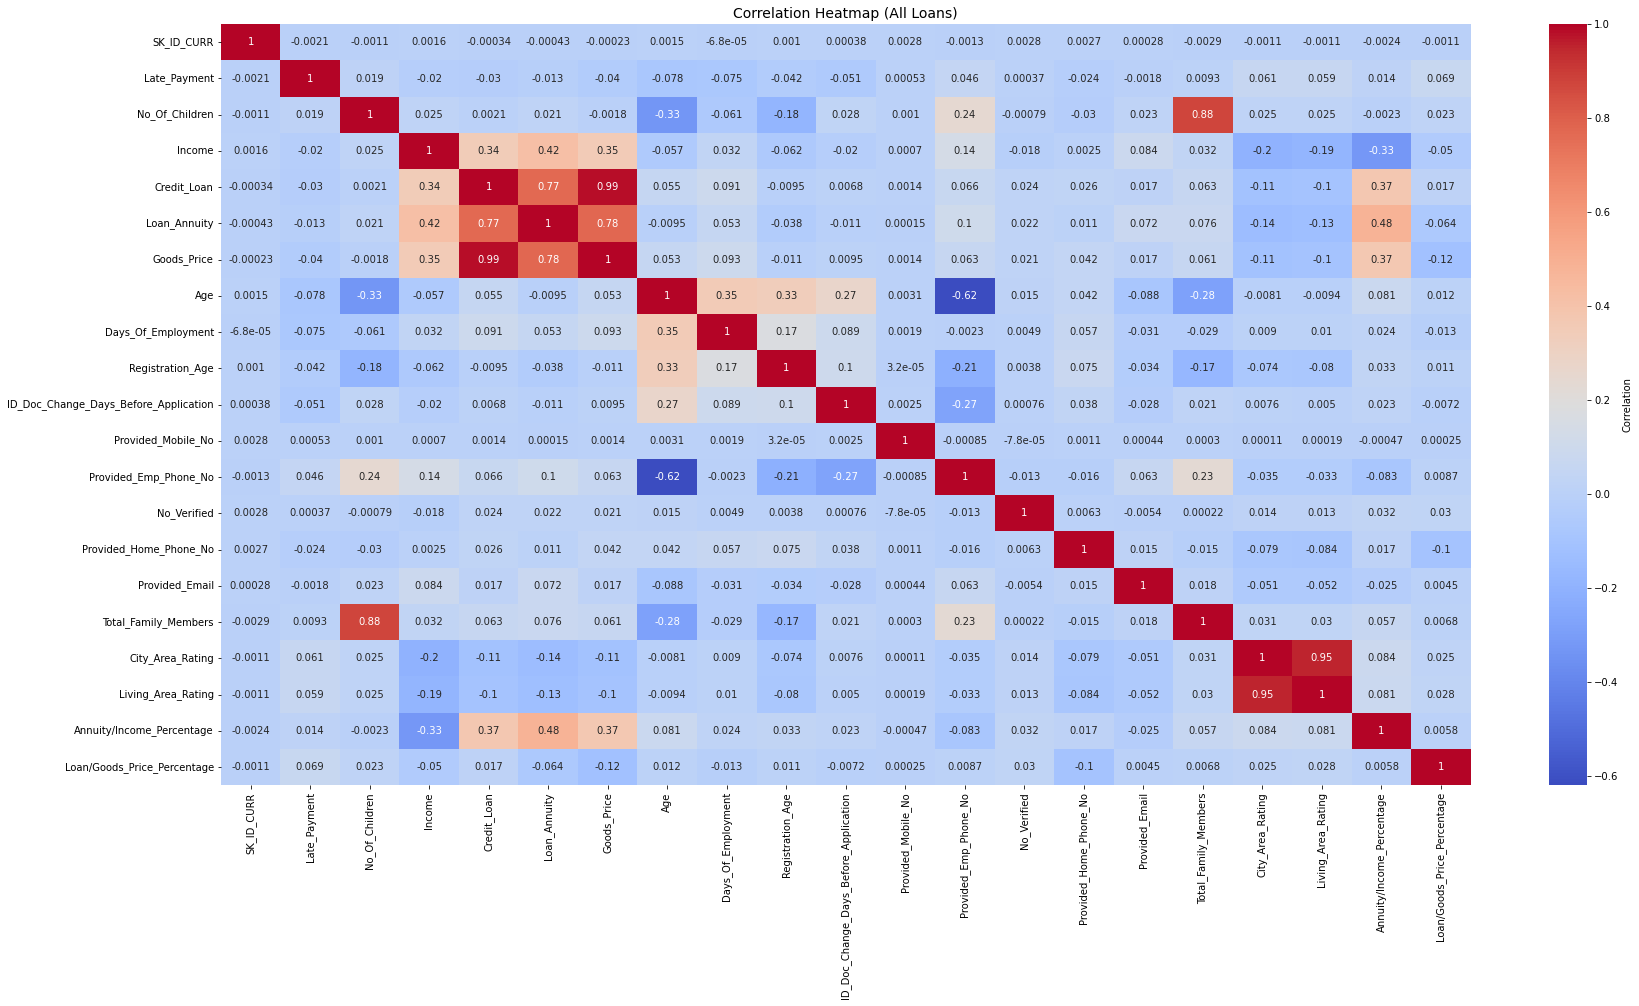

In [81]:
#make a correlation heatmap for all loans
plt.figure(figsize=(28,14))
sns.heatmap(df_appli.corr(), annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (All Loans)', fontsize=14)
plt.show()


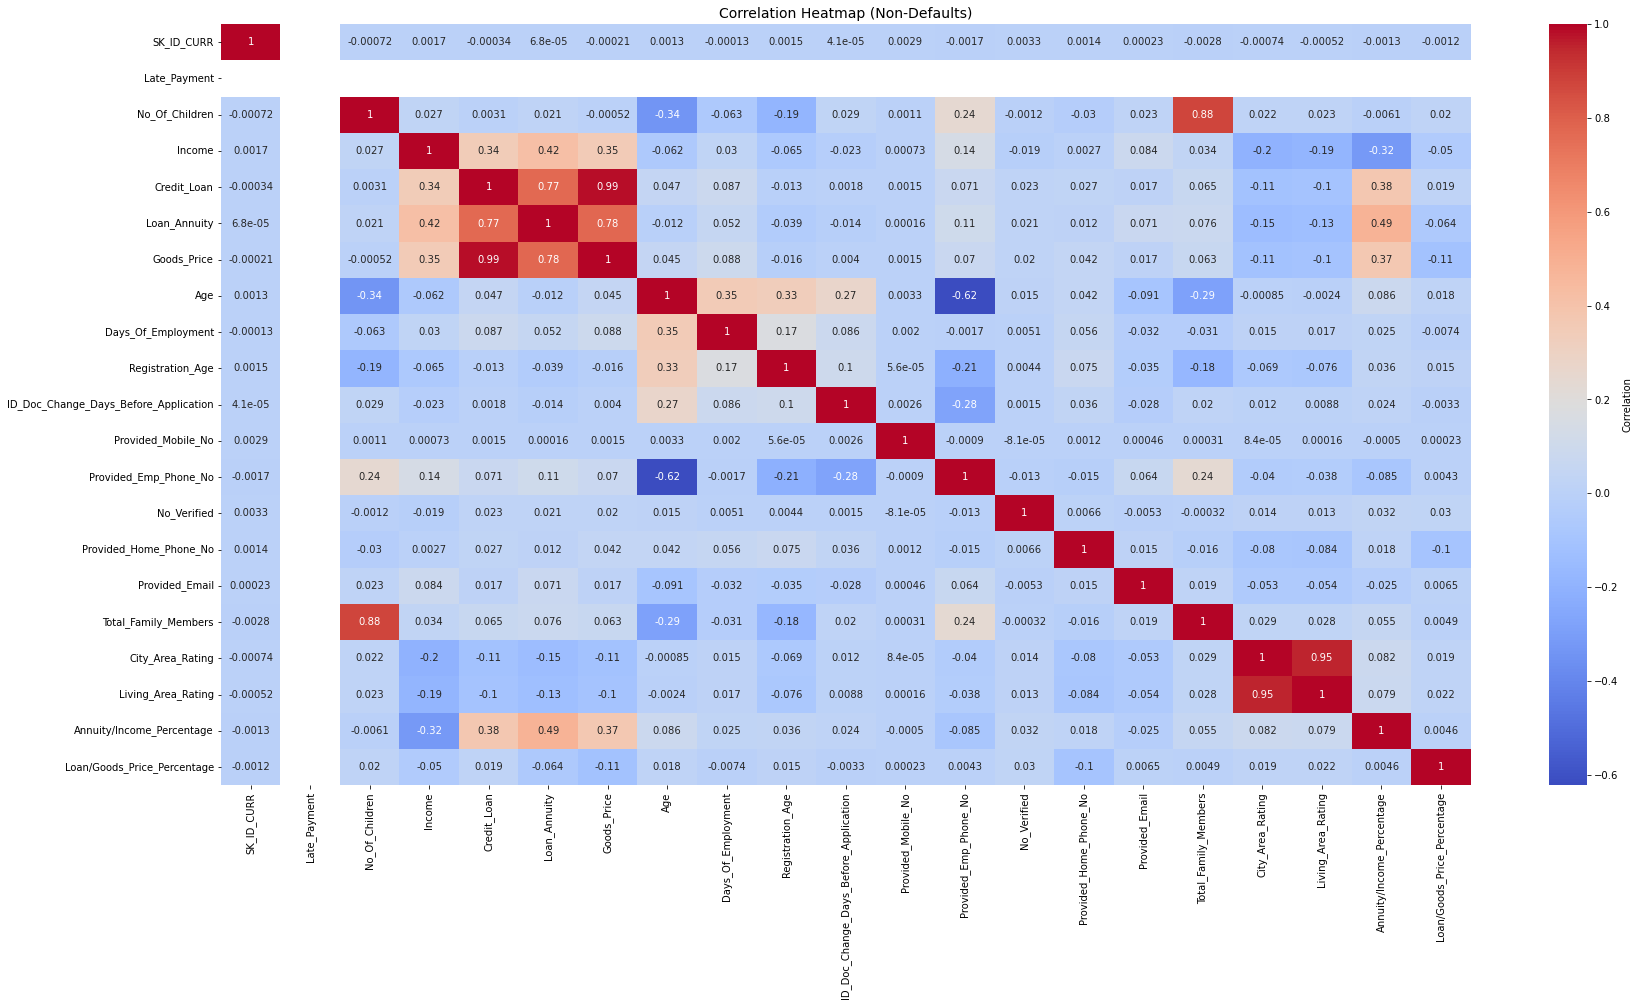

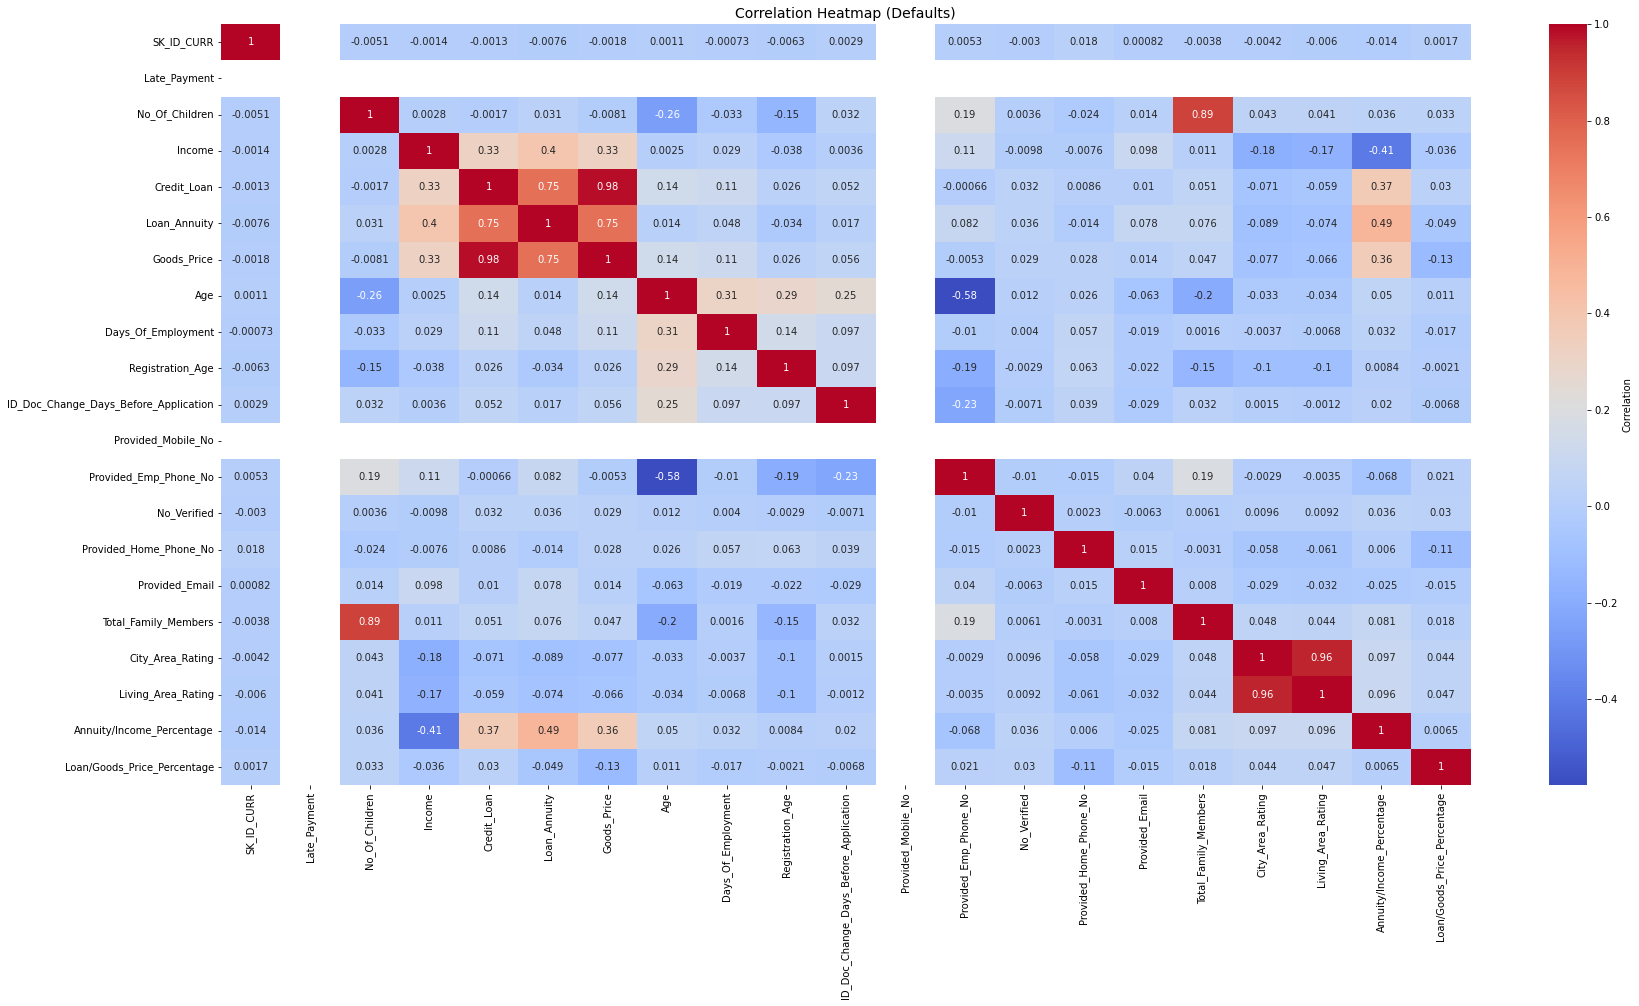

In [82]:
#make a correlation heatmap for non-defaulted
plt.figure(figsize=(28,14))
sns.heatmap(non_default_df.corr(), annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (Non-Defaults)', fontsize=14)
plt.show()

#make a correlation heatmap for defaulted
plt.figure(figsize=(28,14))
sns.heatmap(default_df.corr(), annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (Defaults)', fontsize=14)
plt.show()

Both of the heatmaps shows that there is only few strong correlations (showed in orange-red color)

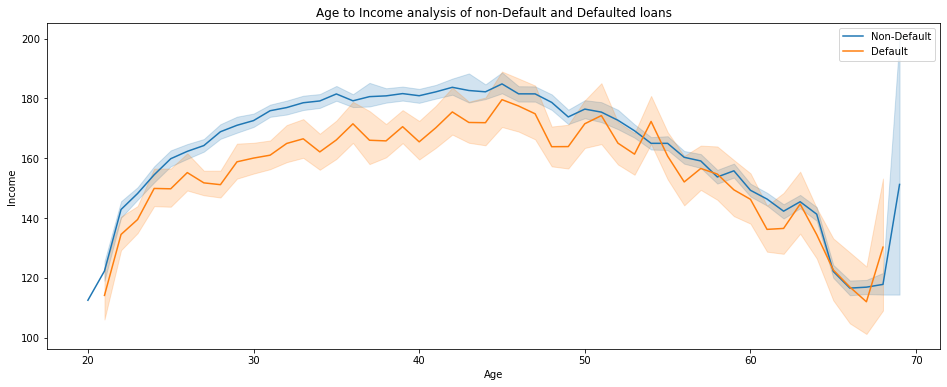

In [83]:

plt.figure(figsize=(16,6))
sns.lineplot(data=df_appli , y="Income" , x="Age" , hue="Late_Payment").set_title("Age to Income analysis of non-Default and Defaulted loans")
plt.legend(labels=["Non-Default", "Default"])
plt.show()

From the line chart:
1. Age 30 - 50 are the highest income earner among loaners.
2. almost all age groups have lower defaulters than non defaults.

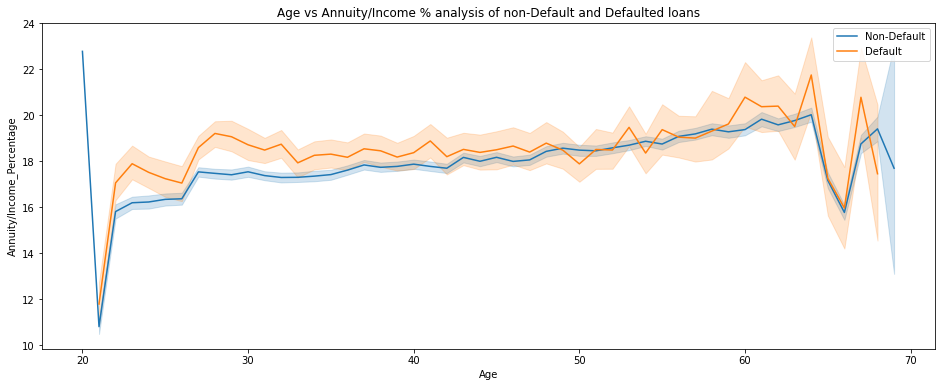

In [84]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_appli , y="Annuity/Income_Percentage" , x="Age" , hue="Late_Payment").set_title("Age vs Annuity/Income % analysis of non-Default and Defaulted loans")
plt.legend(labels=["Non-Default", "Default"])
plt.show()

From this line chart:
1. For younger age groups, The % of Annuity to Income have more defaulted than non-defaulted ones. Hence, the % of annuity compared to income shows that, this age groups have difficulty payments.

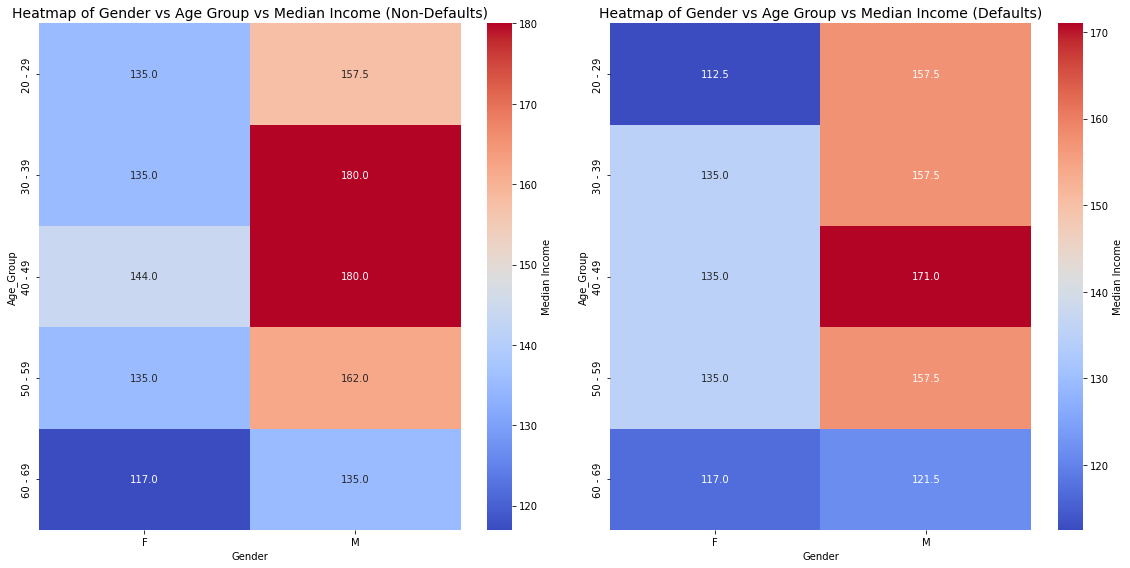

In [85]:
#heat map for Gender and Age_Group by median Income for non_default and default loan
# Adjusting the figure size
plt.figure(figsize=(16,8))

# Heatmap for Non-Default Clients
plt.subplot(1,2,1)
pivot_non_default = pd.pivot_table(data=non_default_df, index="Age_Group", columns="Gender", values="Income", aggfunc=np.median)
sns.heatmap(pivot_non_default, annot=True, cmap="coolwarm", cbar_kws={'label': 'Median Income'}, fmt=".1f")
plt.title('Heatmap of Gender vs Age Group vs Median Income (Non-Defaults)', fontsize=14)

# Heatmap for Default Clients
plt.subplot(1,2,2)
pivot_default = pd.pivot_table(data=default_df, index="Age_Group", columns="Gender", values="Income", aggfunc=np.median)
sns.heatmap(pivot_default, annot=True, cmap="coolwarm", cbar_kws={'label': 'Median Income'}, fmt=".1f")
plt.title('Heatmap of Gender vs Age Group vs Median Income (Defaults)', fontsize=14)

# Display the visualizations
plt.tight_layout()
plt.show()


In 20-29, 30-39, 40-49,50-59 of the Age group and Gender we can see the median income of the people who are defaulter is less as compared to the same for the non-defaulters. So low income is one of the factors for a client to default.

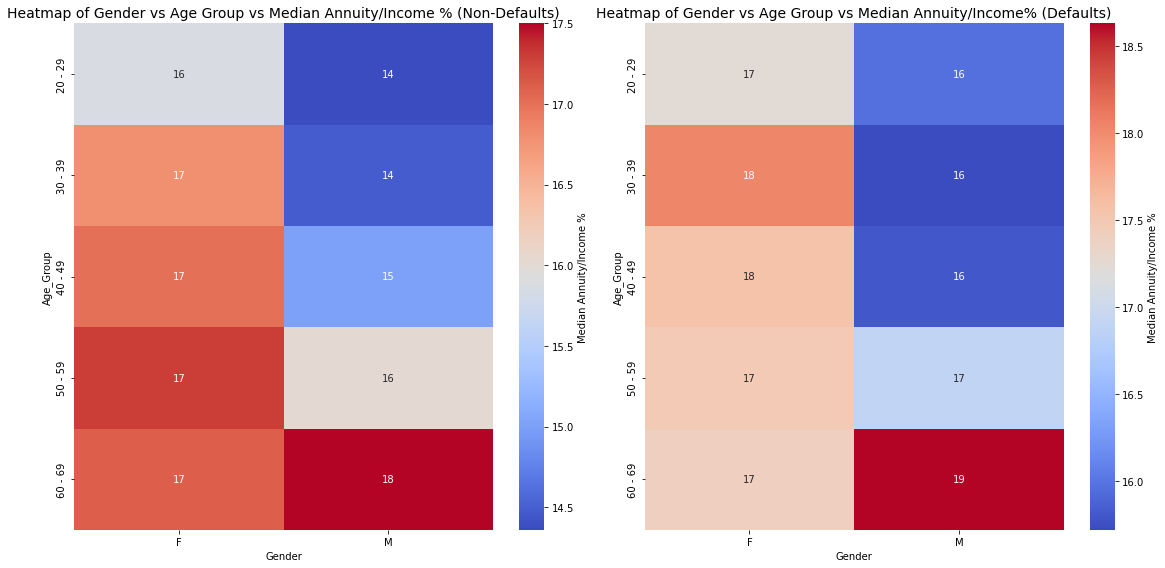

In [86]:
#heat map for Gender and Age_Group by median Income/Aunnuity % for non_default and default loan
# Adjusting the figure size
plt.figure(figsize=(16,8))

# Heatmap for Non-Default Clients
plt.subplot(1,2,1)
pivot_non_default = pd.pivot_table(data=non_default_df, index="Age_Group", columns="Gender", values="Annuity/Income_Percentage", aggfunc=np.median)
sns.heatmap(pivot_non_default, annot=True, cmap="coolwarm", cbar_kws={'label': 'Median Annuity/Income %'}, fmt=".0f")
plt.title('Heatmap of Gender vs Age Group vs Median Annuity/Income % (Non-Defaults)', fontsize=14)

# Heatmap for Default Clients
plt.subplot(1,2,2)
pivot_default = pd.pivot_table(data=default_df, index="Age_Group", columns="Gender", values="Annuity/Income_Percentage", aggfunc=np.median)
sns.heatmap(pivot_default, annot=True, cmap="coolwarm", cbar_kws={'label': 'Median Annuity/Income %'}, fmt=".0f")
plt.title('Heatmap of Gender vs Age Group vs Median Annuity/Income% (Defaults)', fontsize=14)

# Display the visualizations
plt.tight_layout()
plt.show()

The median Annuity/Income % in the Age_group of 20s and 30s is having higher values than other Age_Groups (2k difference as opposed to 1k s)

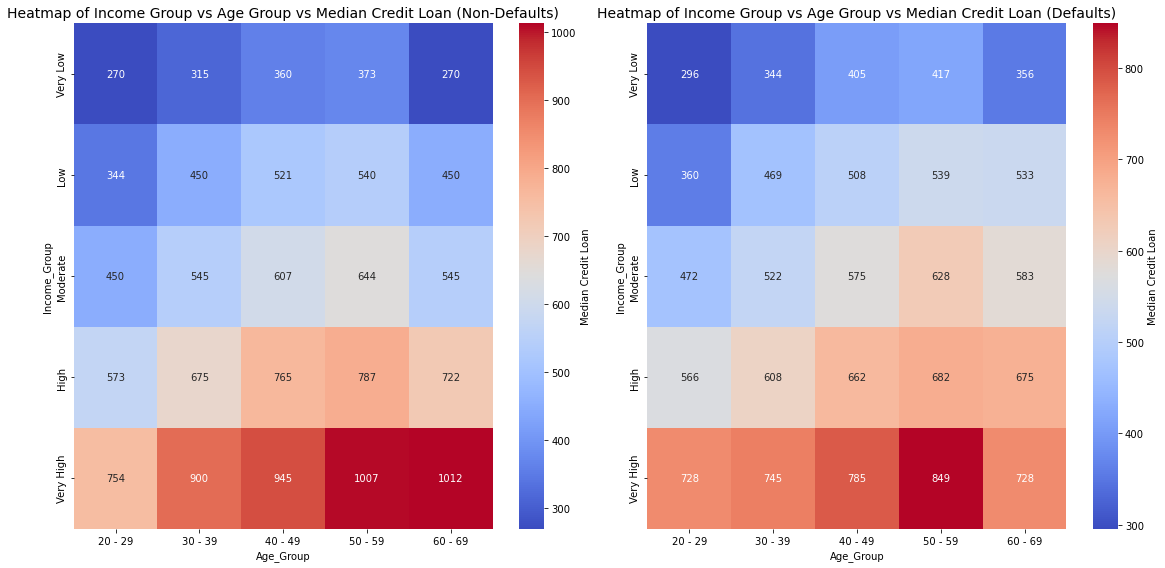

In [87]:
#heat map for Income_Group and Age_Group by median Credit_Loan for non_default and default loan
# Adjusting the figure size
plt.figure(figsize=(16,8))

# Heatmap for Non-Default Clients
plt.subplot(1,2,1)
pivot_non_default = pd.pivot_table(data=non_default_df, index="Income_Group", columns="Age_Group", values="Credit_Loan", aggfunc=np.median)
sns.heatmap(pivot_non_default, annot=True, cmap="coolwarm", cbar_kws={'label': 'Median Credit Loan'}, fmt=".0f")
plt.title('Heatmap of Income Group vs Age Group vs Median Credit Loan (Non-Defaults)', fontsize=14)

# Heatmap for Default Clients
plt.subplot(1,2,2)
pivot_default = pd.pivot_table(data=default_df, index="Income_Group", columns="Age_Group", values="Credit_Loan", aggfunc=np.median)
sns.heatmap(pivot_default, annot=True, cmap="coolwarm", cbar_kws={'label': 'Median Credit Loan'}, fmt=".0f")
plt.title('Heatmap of Income Group vs Age Group vs Median Credit Loan (Defaults)', fontsize=14)

# Display the visualizations
plt.tight_layout()
plt.show()

median credit loan for defaulters is very high among the very low and low income groups, this shows that this groups have difficulty in paying up the loans as their credit loan is high.

### 3b. Analysis of df_prev

#### 1.Univariate Analysis

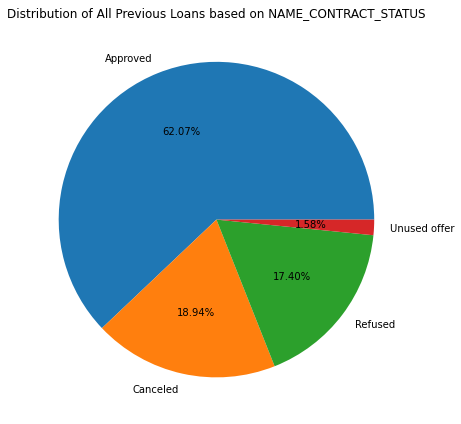

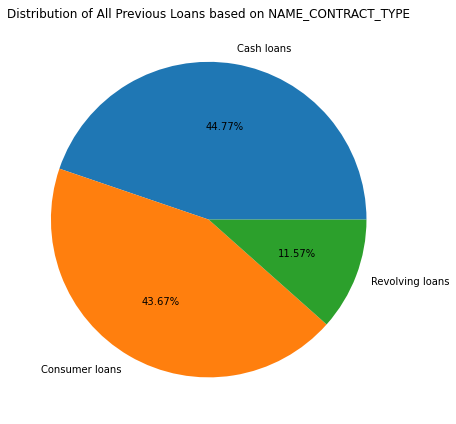

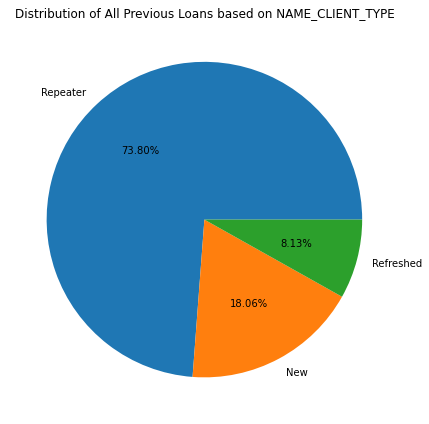

In [88]:
#loan statuses distriution
predictors_prev = ['NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE' , 'NAME_CLIENT_TYPE',  ]
for i in predictors_prev:
    plt.figure(figsize=(12,6))
    plt.title(f'Distribution of All Previous Loans based on {i}')
    plt.pie(df_prev[i].value_counts(), autopct='%1.2f%%', labels=df_prev[i].value_counts().index)

    plt.tight_layout()
    plt.show()
    
    

1. Most of the previous loans are approved.
2. Most of the previous loan application are Cash Loans followed by Consumer Loans
3. Most of the loans are from Repeaters (those who had been loaned before). Only 18.06% are new.

#### Bivariate analysis

<Figure size 864x432 with 0 Axes>

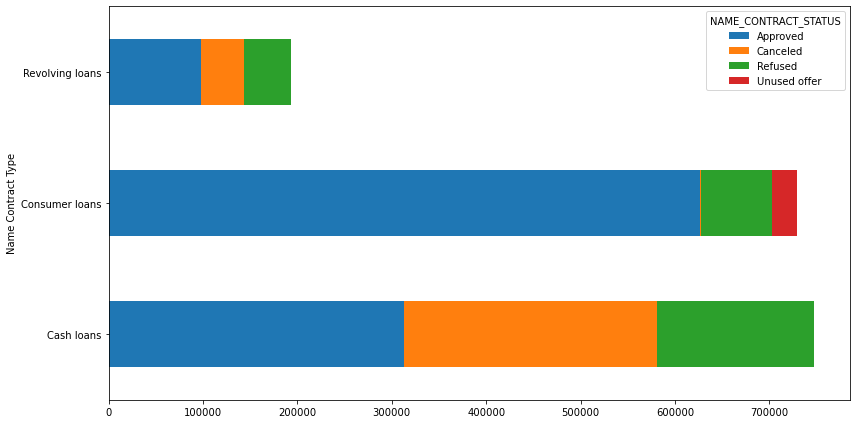

In [89]:
plt.figure(figsize=(12,6))
# Pivot the data to create a stacked bar chart
contract_type_status = df_prev.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']).size().unstack()
# Plotting the stacked bar chart
contract_type_status.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.ylabel('Name Contract Type')
plt.tight_layout()
plt.show()

1. Consumer loans are most approved and rarely cancel, they are the most reliable types.

### 3c. Merged Analysis

In [90]:
# merge both dataframes based on SK_ID_CURR
df_merged =pd.merge(df_prev,df_appli,how="inner",on="SK_ID_CURR")

In [91]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413698 entries, 0 to 1413697
Data columns (total 58 columns):
 #   Column                                 Non-Null Count    Dtype   
---  ------                                 --------------    -----   
 0   AMT_GOODS_PRICE                        1094173 non-null  float64 
 1   AMT_ANNUITY                            1106481 non-null  float64 
 2   CNT_PAYMENT                            1106486 non-null  float64 
 3   PRODUCT_COMBINATION                    1413385 non-null  object  
 4   CHANNEL_TYPE                           1413698 non-null  object  
 5   NAME_PRODUCT_TYPE                      513648 non-null   object  
 6   NAME_YIELD_GROUP                       984501 non-null   object  
 7   SELLERPLACE_AREA                       1413698 non-null  int64   
 8   NAME_SELLER_INDUSTRY                   698376 non-null   object  
 9   NAME_GOODS_CATEGORY                    616489 non-null   object  
 10  NAME_PORTFOLIO                

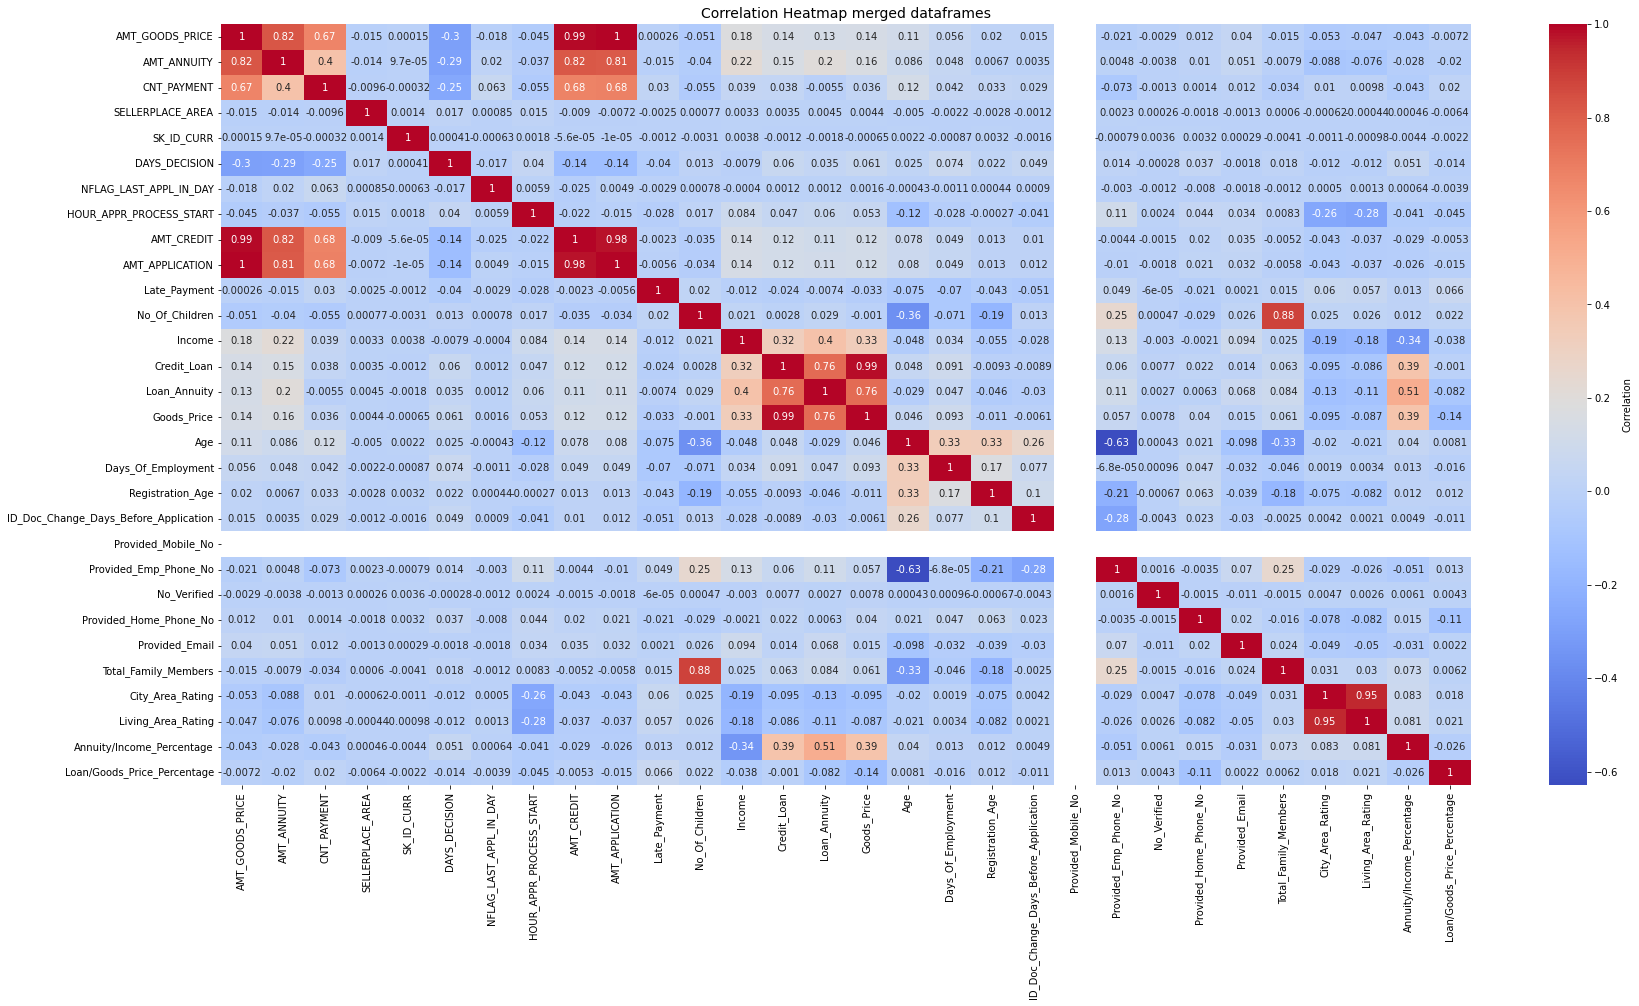

In [92]:
plt.figure(figsize=(28,14))
sns.heatmap(df_merged.corr(), annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap merged dataframes', fontsize=14)
plt.show()